# 데이터 등록 및 전처리

In [104]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
# 파이썬 시각화 패키지 불러오기
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import platform
# 운영체제별 한글 폰트 설정

if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정
# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Gulim'

member = pd.read_csv('Member_data02.csv')
product = pd.read_csv('Product_data.csv')
sales = pd.read_csv('Sales_data02.csv')

C:\Users\Joo\AppData\Local\Temp\ipykernel_12696\3298579644.py:25: DtypeWarning:

Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.



In [105]:
# member 데이터의 'ID'와 sales 데이터의 '고객번호'가 동일한 내용이라고 판단
# '고객번호' 컬럼명 변경 및 형변환

sales.rename(columns = {'고객번호' : 'ID'}, inplace = True)
sales['ID'] = sales['ID'].astype('float')
sales.head()

,주문번호,구매일,배송시작일,배송완료일,구매시월령(수정),ID,구매금액,결제금액,물품대분류,상품명
0,201905052342970,2019-05-06,2019-05-07,2019-05-11,4.0,2.018123e+14,25800,16314,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입)
1,202002203424450,2020-02-20,2020-02-21,2020-02-23,14.0,2.018123e+14,51200,37769,팬티,NEW 하기스 맥스드라이 팬티 5단계 남아 80매(팬티형)
2,201902282095385,2019-02-28,2019-03-01,2019-03-05,NaN,2.018123e+14,5610,3800,FMC,크리넥스？키즈용？화장지？3겹？27m 8롤
3,201905132367003,2019-05-13,2019-05-14,2019-05-16,66.0,2.018123e+14,59520,47922,기저귀,하기스 네이처메이드 밤부 3단계 여아 144매(밴드형)
4,201905092356247,2019-05-10,2019-05-11,2019-05-13,5.0,2.018123e+14,50640,39788,기저귀,하기스 에어솔솔 썸머기저귀 3단계 공용 144매(밴드형)


In [106]:
# member 데이터와 sales 데이터 merge
# 구매일 데이터를 데이트타임으로 변환 후 구매월 컬럼 생성

sm_merge = sales.merge(member, on = 'ID')
data = sm_merge.drop(['주문번호','배송시작일','배송완료일'],axis=1)
data['구매일'] = pd.to_datetime(data['구매일'], format = '%Y-%m-%d')
data['구매연월'] = data['구매일'].dt.strftime('%Y%m')
data.head()

,구매일,구매시월령(수정),ID,구매금액,결제금액,물품대분류,상품명,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부,구매연월
0,2019-05-06,4.0,2.018123e+14,25800,16314,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),여,기혼,인천,37.0,국민은행,인스타그램,Yes,201905
1,2020-02-20,14.0,2.018123e+14,51200,37769,팬티,NEW 하기스 맥스드라이 팬티 5단계 남아 80매(팬티형),여,기혼,인천,37.0,국민은행,인스타그램,Yes,202002
2,2019-02-28,NaN,2.018123e+14,5610,3800,FMC,크리넥스？키즈용？화장지？3겹？27m 8롤,여,기혼,제주,33.0,국민은행,검색광고,Yes,201902
3,2019-05-13,66.0,2.018123e+14,59520,47922,기저귀,하기스 네이처메이드 밤부 3단계 여아 144매(밴드형),여,기혼,부산,32.0,하나은행,네이버블로그,Yes,201905
4,2019-05-10,5.0,2.018123e+14,50640,39788,기저귀,하기스 에어솔솔 썸머기저귀 3단계 공용 144매(밴드형),여,미혼,경남,34.0,기업은행,지인추천,No,201905


In [107]:
data.describe()

,구매시월령(수정),ID,구매금액,결제금액,연령
count,167840.000000,1.995830e+05,199583.000000,199583.000000,199583.000000
mean,14.852050,2.019052e+14,30570.144401,21712.313093,32.816668
std,38.531833,4.780624e+09,30555.274398,21338.046419,2.946886
min,-10.000000,2.018123e+14,0.000000,-35166.000000,20.000000
25%,2.000000,2.019022e+14,7400.000000,6000.000000,31.000000
50%,6.000000,2.019043e+14,17500.000000,12602.000000,33.000000
75%,13.000000,2.019081e+14,51200.000000,34799.000000,35.000000
max,1439.000000,2.019123e+14,598000.000000,539000.000000,46.000000


# 데이터 확인 및 분석

In [108]:
# ID 별 구매 건수 및 재구매율

buy_times = data.groupby('ID', as_index = False).agg(count = ('구매일','count'))
buy_times[buy_times['count'] >= 3].sort_values(by = 'count')    # count q3(75%) 값 = 3

# 3회 이상 재구매율 약 26.7 %

,ID,count
34522,2.019042e+14,3
18421,2.019022e+14,3
48344,2.019070e+14,3
18417,2.019022e+14,3
48355,2.019070e+14,3
...,...,...
21472,2.019030e+14,55
59678,2.019090e+14,55
20177,2.019023e+14,56
21618,2.019030e+14,57


In [109]:
# 구매시월령(수정)이 100 보다 클 경우 일단위로 잘못 기입한 경우라고 판단 -> 30으로 나눠 월단위로 변환

def age(x):
    if x > 100:
        return round(x / 30,0)
    else:
        return x
data['구매시자녀월령'] = data['구매시월령(수정)'].apply(age)

data

,구매일,구매시월령(수정),ID,구매금액,결제금액,물품대분류,상품명,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부,구매연월,구매시자녀월령
0,2019-05-06,4.0,2.018123e+14,25800,16314,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),여,기혼,인천,37.0,국민은행,인스타그램,Yes,201905,4.0
1,2020-02-20,14.0,2.018123e+14,51200,37769,팬티,NEW 하기스 맥스드라이 팬티 5단계 남아 80매(팬티형),여,기혼,인천,37.0,국민은행,인스타그램,Yes,202002,14.0
2,2019-02-28,NaN,2.018123e+14,5610,3800,FMC,크리넥스？키즈용？화장지？3겹？27m 8롤,여,기혼,제주,33.0,국민은행,검색광고,Yes,201902,NaN
3,2019-05-13,66.0,2.018123e+14,59520,47922,기저귀,하기스 네이처메이드 밤부 3단계 여아 144매(밴드형),여,기혼,부산,32.0,하나은행,네이버블로그,Yes,201905,66.0
4,2019-05-10,5.0,2.018123e+14,50640,39788,기저귀,하기스 에어솔솔 썸머기저귀 3단계 공용 144매(밴드형),여,미혼,경남,34.0,기업은행,지인추천,No,201905,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199578,2020-02-01,8.0,2.019123e+14,53920,45971,팬티,하기스 네이처메이드 팬티 3단계 여아 116매(팬티형),여,기혼,충북,26.0,삼성카드,검색광고,Yes,202002,8.0
199579,2020-02-04,8.0,2.019123e+14,5900,5841,체험팩,NEW 하기스 맥스드라이 팬티 3단계 공용 20매(팬티형/체험팩),여,기혼,충북,26.0,삼성카드,검색광고,Yes,202002,8.0
199580,2020-07-18,13.0,2.019123e+14,99800,73588,팬티,하기스 NEW 네이처메이드 썸머팬티 4단계 공용 82매(팬티형),여,기혼,충북,26.0,삼성카드,검색광고,Yes,202007,13.0
199581,2019-12-29,NaN,2.019123e+14,51000,36579,팬티,2020 하기스 맥스드라이 팬티 4단계 공용 96매(팬티형),여,기혼,경기,32.0,새마을금고,인스타그램,Yes,201912,NaN


<AxesSubplot:xlabel='연령', ylabel='count'>

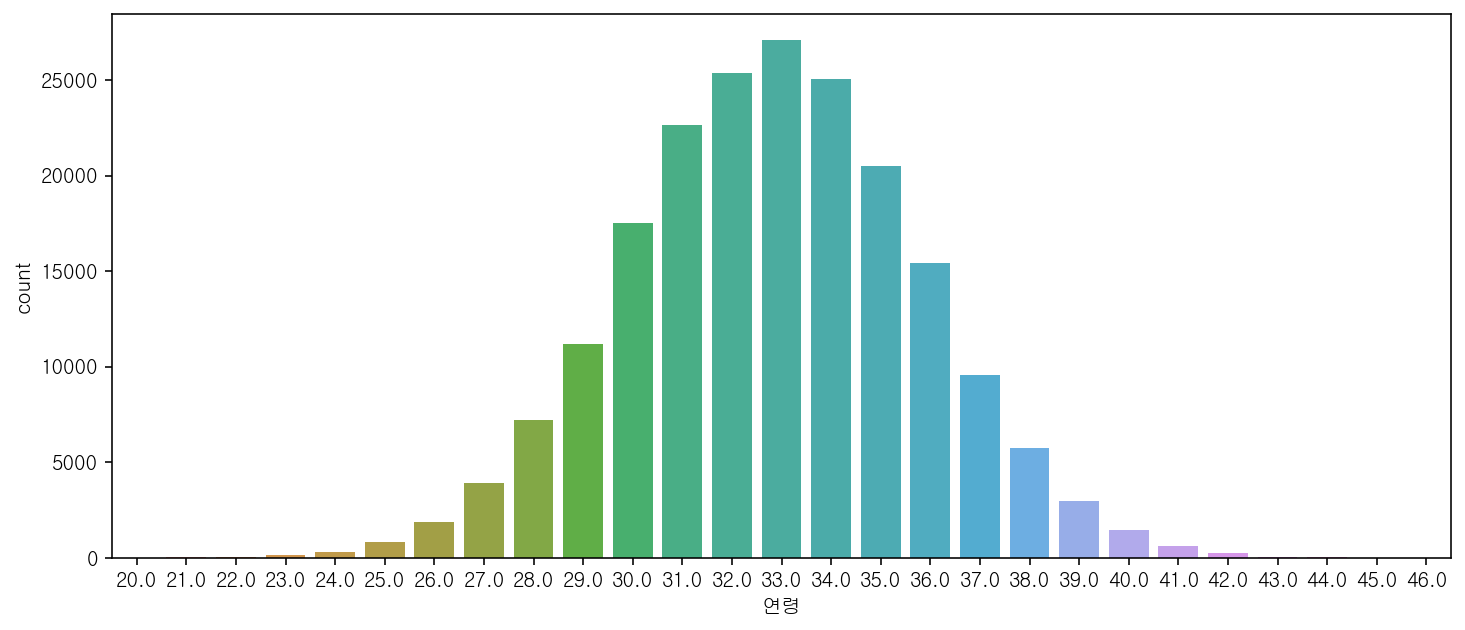

In [110]:
# 연령대 별 구매 건수

age = data.groupby('연령').agg(count = ('ID','count')).reset_index()
plt.figure(figsize=(12,5))
sns.barplot(data = age, x = '연령', y = 'count')

In [111]:
# 구매 건수의 분포가 가장 높은 30~36세
# 30~36세의 '구매시월령(수정2)' 평균 값으로 '구매시월령(수정2)'의 NaN 값을 대체

import math

data['구매시자녀월령'] = data['구매시자녀월령'].fillna(
    math.floor(data[(data['연령'] >= 30) & (data['연령'] <= 36)]['구매시자녀월령'].mean()))

data['상품명'] = data['상품명'].str.replace('？', ' ')
data = data.drop(['구매시월령(수정)'], axis = 1)
data.head()

,구매일,ID,구매금액,결제금액,물품대분류,상품명,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부,구매연월,구매시자녀월령
0,2019-05-06,2.018123e+14,25800,16314,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),여,기혼,인천,37.0,국민은행,인스타그램,Yes,201905,4.0
1,2020-02-20,2.018123e+14,51200,37769,팬티,NEW 하기스 맥스드라이 팬티 5단계 남아 80매(팬티형),여,기혼,인천,37.0,국민은행,인스타그램,Yes,202002,14.0
2,2019-02-28,2.018123e+14,5610,3800,FMC,크리넥스 키즈용 화장지 3겹 27m 8롤,여,기혼,제주,33.0,국민은행,검색광고,Yes,201902,10.0
3,2019-05-13,2.018123e+14,59520,47922,기저귀,하기스 네이처메이드 밤부 3단계 여아 144매(밴드형),여,기혼,부산,32.0,하나은행,네이버블로그,Yes,201905,66.0
4,2019-05-10,2.018123e+14,50640,39788,기저귀,하기스 에어솔솔 썸머기저귀 3단계 공용 144매(밴드형),여,미혼,경남,34.0,기업은행,지인추천,No,201905,5.0


## 자녀 연령대 별 구매 상품

In [112]:
# 구매시자녀월령 데이터를 사용해 자녀연령대 컬럼 생성

def baby(x):
    if x < -2:
        return '출산전'
    elif x < 3:
        return '출산'
    elif x < 7:
        return '100일후'
    elif x < 12:
        return '영아기'
    elif x < 36:
        return '유아기'
    else:
        return '아동'
    
data['자녀연령대'] = data['구매시자녀월령'].apply(baby)

In [113]:
data.head()

,구매일,ID,구매금액,결제금액,물품대분류,상품명,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부,구매연월,구매시자녀월령,자녀연령대
0,2019-05-06,2.018123e+14,25800,16314,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),여,기혼,인천,37.0,국민은행,인스타그램,Yes,201905,4.0,100일후
1,2020-02-20,2.018123e+14,51200,37769,팬티,NEW 하기스 맥스드라이 팬티 5단계 남아 80매(팬티형),여,기혼,인천,37.0,국민은행,인스타그램,Yes,202002,14.0,유아기
2,2019-02-28,2.018123e+14,5610,3800,FMC,크리넥스 키즈용 화장지 3겹 27m 8롤,여,기혼,제주,33.0,국민은행,검색광고,Yes,201902,10.0,영아기
3,2019-05-13,2.018123e+14,59520,47922,기저귀,하기스 네이처메이드 밤부 3단계 여아 144매(밴드형),여,기혼,부산,32.0,하나은행,네이버블로그,Yes,201905,66.0,아동
4,2019-05-10,2.018123e+14,50640,39788,기저귀,하기스 에어솔솔 썸머기저귀 3단계 공용 144매(밴드형),여,미혼,경남,34.0,기업은행,지인추천,No,201905,5.0,100일후


In [114]:
# 자녀연령대에 따른 물품대분류 별 구매건수

c_age = data.groupby(['자녀연령대','물품대분류']).agg(count = ('ID','count')).reset_index()
c_age[c_age['자녀연령대'] == '출산전'].sort_values(by = 'count', ascending = False)

,자녀연령대,물품대분류,count
58,출산전,체험팩,3852
56,출산전,더블하트,794
51,출산전,FMC,604
54,출산전,기저귀,286
50,출산전,FC,280
57,출산전,물티슈,199
59,출산전,팬티,187
52,출산전,SKC,153
55,출산전,기타,128
53,출산전,SrC,1


In [115]:
b_birth = data[data['자녀연령대'] == '출산전']
birth = data[data['자녀연령대'] == '출산']
a_birth = data[data['자녀연령대'] == '100일후']
baby = data[data['자녀연령대'] == '영아기']
e_child = data[data['자녀연령대'] == '유아기']
child = data[data['자녀연령대'] == '아동']

Text(0, 0.5, '구매건수')

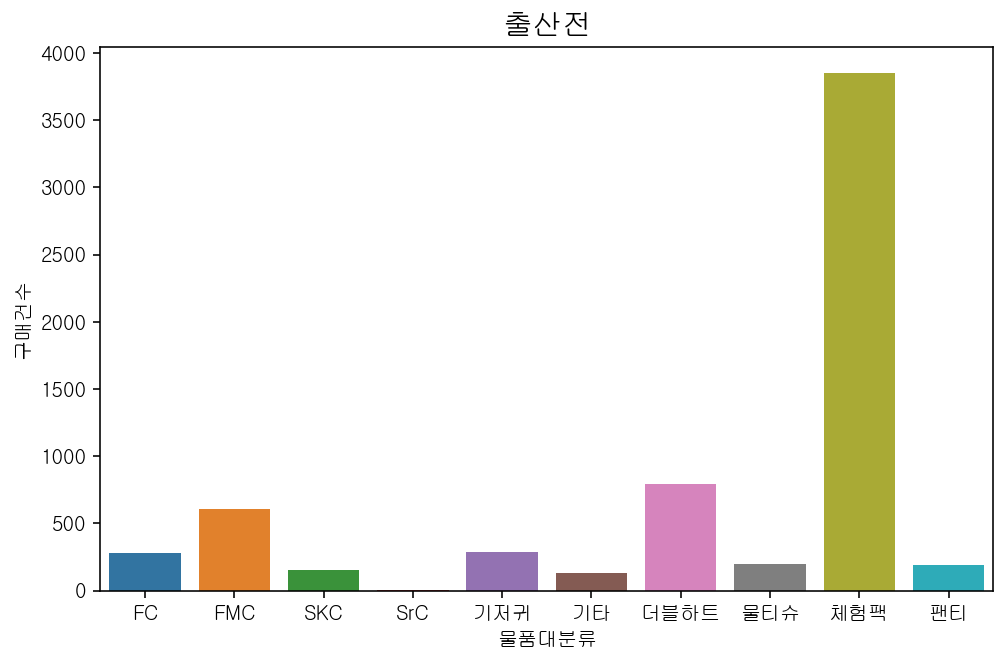

In [116]:
# 출산전

b_birth_g = b_birth.groupby('물품대분류',as_index = False).agg(count = ('ID','count'))
plt.figure(figsize = (8,5))
sns.barplot(data = b_birth_g, x = '물품대분류', y = 'count')
plt.title('출산전', size = 15)
plt.ylabel('구매건수')

In [117]:
b_birth.groupby(['물품대분류','상품명'],as_index = False).agg(
    count = ('ID','count')).sort_values(by = 'count', ascending = False).head()

,물품대분류,상품명,count
564,체험팩,맘큐 허그박스,3558
382,더블하트,더블하트 SofTouch 모유실감 젖꼭지 S (2입),84
587,체험팩,하기스 맥스드라이 3단계 공용 20매(밴드형/체험팩),39
129,FMC,크리넥스 순수 3겹 소프트 27m-30롤,37
365,더블하트,더블하트 SofTouch 모유실감 노꼭지 트윈팩 160ml(오렌지),37


Text(0, 0.5, '구매건수')

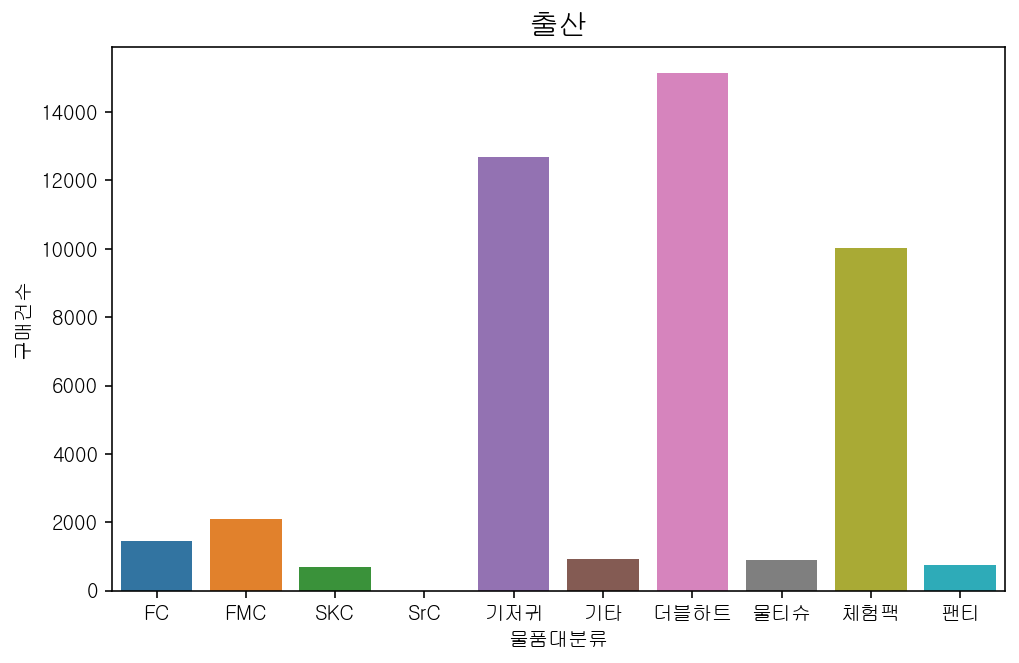

In [118]:
# 출산

birth_g = birth.groupby('물품대분류',as_index = False).agg(count = ('ID','count'))
plt.figure(figsize = (8,5))
sns.barplot(data = birth_g, x = '물품대분류', y = 'count')
plt.title('출산', size = 15)
plt.ylabel('구매건수')

In [119]:
birth.groupby(['물품대분류','상품명'],as_index = False).agg(
    count = ('ID','count')).sort_values(by = 'count', ascending = False).head()

,물품대분류,상품명,count
1281,체험팩,맘큐 허그박스,6818
453,기저귀,하기스 네이처메이드 2단계 남아 156매(밴드형),1972
455,기저귀,하기스 네이처메이드 2단계 여아 156매(밴드형),1971
964,더블하트,더블하트 SofTouch 모유실감 젖꼭지 S (2입),1642
451,기저귀,하기스 네이처메이드 1단계 공용 186매(밴드형),1293


Text(0, 0.5, '구매건수')

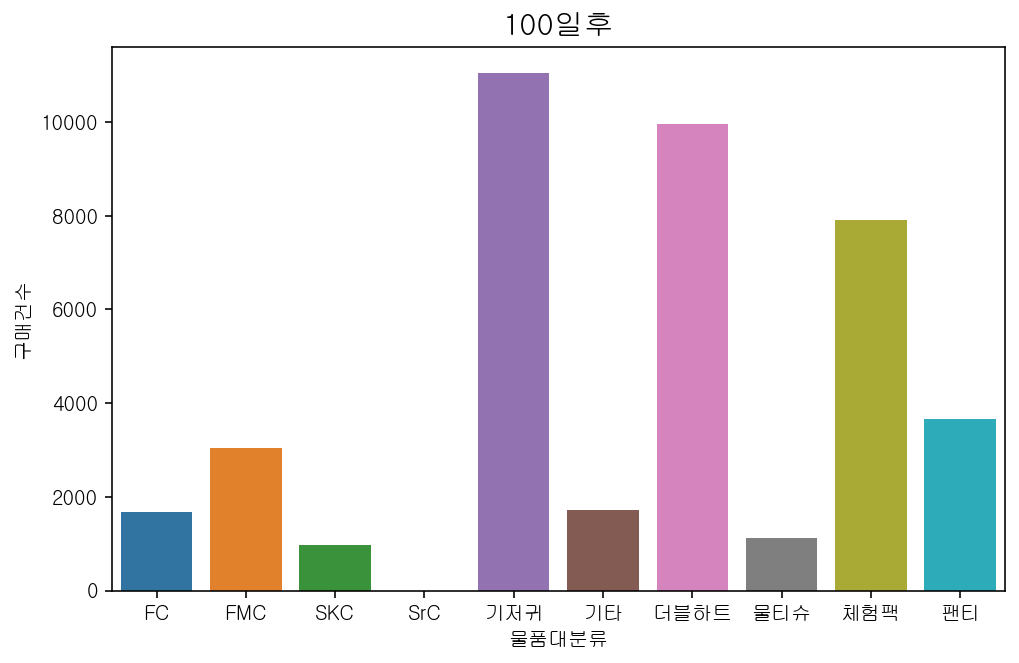

In [120]:
# 100일후

a_birth_g = a_birth.groupby('물품대분류',as_index = False).agg(count = ('ID','count'))
plt.figure(figsize = (8,5))
sns.barplot(data = a_birth_g, x = '물품대분류', y = 'count')
plt.title('100일후', size = 15)
plt.ylabel('구매건수')

In [121]:
a_birth.groupby(['물품대분류','상품명'],as_index = False).agg(
    count = ('ID','count')).sort_values(by = 'count', ascending = False).head()

,물품대분류,상품명,count
1242,더블하트,더블하트 SofTouch 모유실감 젖꼭지 L (2입),1643
591,기저귀,하기스 네이처메이드 3단계 여아 132매(밴드형),1444
588,기저귀,하기스 네이처메이드 3단계 남아 132매(밴드형),1289
1249,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),1111
1625,체험팩,하기스 맥스드라이 3단계 공용 20매(밴드형/체험팩),1059


Text(0, 0.5, '구매건수')

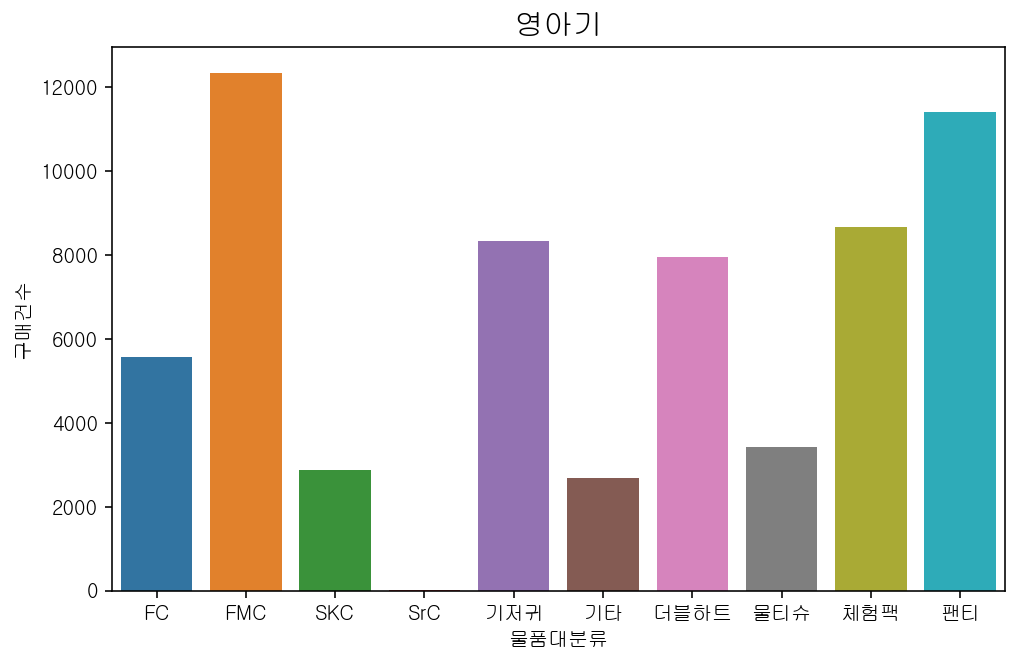

In [122]:
# 영아기

baby_g = baby.groupby('물품대분류',as_index = False).agg(count = ('ID','count'))
plt.figure(figsize = (8,5))
sns.barplot(data = baby_g, x = '물품대분류', y = 'count')
plt.title('영아기', size = 15)
plt.ylabel('구매건수')

In [123]:
baby.groupby(['물품대분류','상품명'],as_index = False).agg(
    count = ('ID','count')).sort_values(by = 'count', ascending = False).head()

,물품대분류,상품명,count
1522,더블하트,더블하트 SofTouch 모유실감 젖꼭지 LL (2입),1105
1899,체험팩,맘큐 허그박스,998
1518,더블하트,더블하트 SofTouch 모유실감 젖꼭지 L (2입),709
705,기저귀,하기스 네이처메이드 3단계 여아 132매(밴드형),654
430,FMC,크리넥스 여행용티슈 카카오프렌즈 70매 X 3개입,647


Text(0, 0.5, '구매건수')

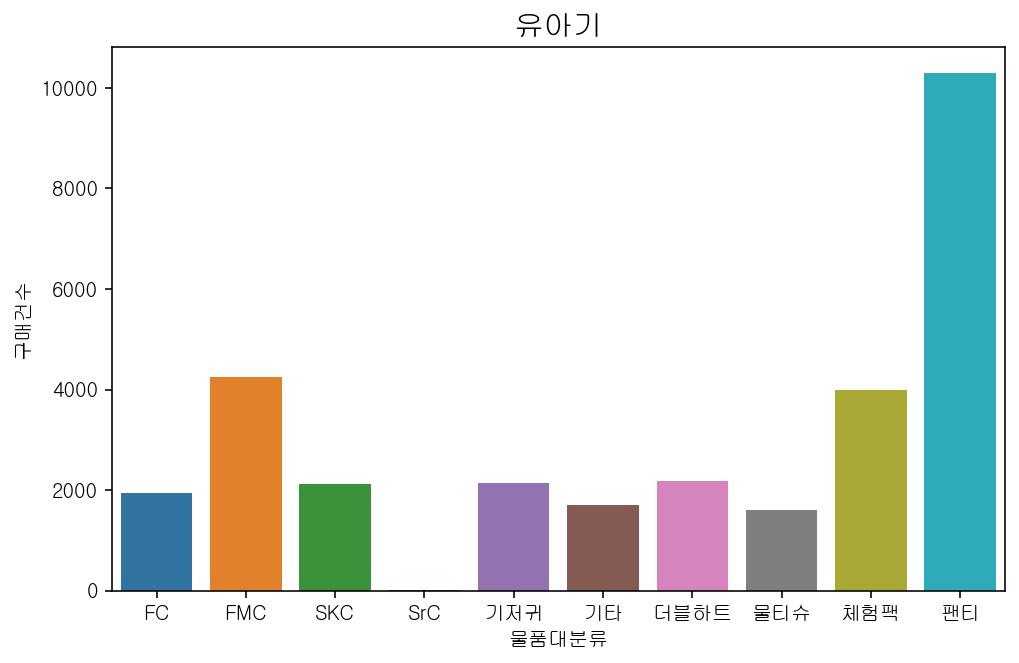

In [124]:
# 유아기

e_child_g = e_child.groupby('물품대분류',as_index = False).agg(count = ('ID','count'))
plt.figure(figsize = (8,5))
sns.barplot(data = e_child_g, x = '물품대분류', y = 'count')
plt.title('유아기', size = 15)
plt.ylabel('구매건수')

In [125]:
e_child.groupby(['물품대분류','상품명'],as_index = False).agg(
    count = ('ID','count')).sort_values(by = 'count', ascending = False).head()

,물품대분류,상품명,count
1818,팬티,하기스 NEW 네이처메이드 썸머팬티 4단계 공용 82매(팬티형),393
1637,체험팩,하기스 맥스드라이 팬티 4단계 여아 20매(팬티형/체험팩),313
1853,팬티,하기스 네이처메이드 팬티 5단계 남아 80매(팬티형),306
1636,체험팩,하기스 맥스드라이 팬티 4단계 남아 20매(팬티형/체험팩),301
1573,체험팩,2020 하기스 매직팬티 컴포트 4단계 남아 20매(팬티형/체험팩),283


Text(0, 0.5, '구매건수')

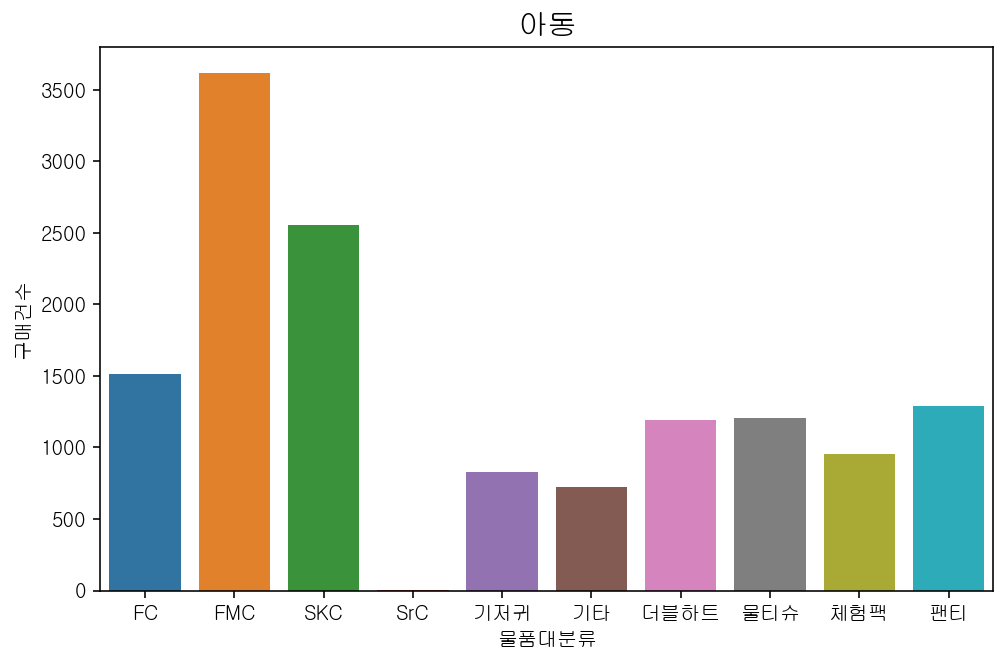

In [126]:
# 아동

child_g = child.groupby('물품대분류',as_index = False).agg(count = ('ID','count'))
plt.figure(figsize = (8,5))
sns.barplot(data = child_g, x = '물품대분류', y = 'count')
plt.title('아동', size = 15)
plt.ylabel('구매건수')

In [127]:
child.groupby(['물품대분류','상품명'],as_index = False).agg(
    count = ('ID','count')).sort_values(by = 'count', ascending = False).head()

,물품대분류,상품명,count
1281,체험팩,맘큐 허그박스,234
344,FMC,크리넥스 여행용티슈 카카오프렌즈 70매 X 3개입,192
499,SKC,그린핑거 힘센보습 울트라 샴푸 300ml,184
501,SKC,그린핑거 힘센보습 울트라 워시 300ml,172
333,FMC,크리넥스 안심 클래식 키친타월 140매 X 12롤,171


In [128]:
data['물품대분류'].unique()

array(['더블하트', '팬티', 'FMC', '기저귀', '체험팩', 'FC', '기타', '물티슈', 'SKC', 'SrC'],
      dtype=object)

In [129]:
product_double = product[product['물품대분류'] == '더블하트'].sort_values('물품판매량', ascending = False)
product_double.head()

,물품대분류,상품명,물품판매량,제품단가
2194,더블하트,더블하트 SofTouch 모유실감 젖꼭지 L (2입),2782,22730
2201,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),2767,20583
2206,더블하트,더블하트 SofTouch 모유실감 젖꼭지 S (2입),2102,17368
2198,더블하트,더블하트 SofTouch 모유실감 젖꼭지 LL (2입),1852,22659
2462,더블하트,더블하트 젖꼭지 브러쉬 와이드형+젖병 스펀지 브러쉬 일반형,1160,14053


In [130]:
product_try = product[product['물품대분류'] == '체험팩'].sort_values('물품판매량', ascending = False)
product_try.head()

,물품대분류,상품명,물품판매량,제품단가
2626,체험팩,맘큐 허그박스,12077,3000
2652,체험팩,하기스 맥스드라이 3단계 공용 20매(밴드형/체험팩),2184,6040
2596,체험팩,2020 하기스 매직 컴포트 3단계 공용 20매(밴드형/체험팩),1340,4900
2655,체험팩,하기스 맥스드라이 팬티 4단계 남아 20매(팬티형/체험팩),1211,7280
2656,체험팩,하기스 맥스드라이 팬티 4단계 여아 20매(팬티형/체험팩),1110,7280


In [131]:
product_FMC = product[product['물품대분류'] == 'FMC'].sort_values('물품판매량', ascending = False)
product_FMC.head()

# 생활용품

,물품대분류,상품명,물품판매량,제품단가
446,FMC,크리넥스 여행용티슈 카카오프렌즈 70매 X 3개입,1179,3635
415,FMC,크리넥스 순수 3겹 소프트 27m-30롤,1074,19343
435,FMC,크리넥스 안심 클래식 키친타월 140매 X 12롤,1029,13631
378,FMC,크리넥스 마이비데 46매 X 10팩,999,22577
433,FMC,크리넥스 안심 클래식 키친타올 120매 X 4롤,816,11153


In [132]:
product_diaper = product[product['물품대분류'] == '기저귀'].sort_values('물품판매량', ascending = False)
product_diaper.head()

,물품대분류,상품명,물품판매량,제품단가
768,기저귀,하기스 네이처메이드 2단계 여아 156매(밴드형),3010,64679
766,기저귀,하기스 네이처메이드 2단계 남아 156매(밴드형),2792,65175
774,기저귀,하기스 네이처메이드 3단계 여아 132매(밴드형),2591,64072
771,기저귀,하기스 네이처메이드 3단계 남아 132매(밴드형),2375,63401
763,기저귀,하기스 네이처메이드 1단계 공용 186매(밴드형),1774,61728


In [133]:
product_panty = product[product['물품대분류'] == '팬티'].sort_values('물품판매량', ascending = False)
product_panty.head()

,물품대분류,상품명,물품판매량,제품단가
2921,팬티,하기스 네이처메이드 팬티 4단계 여아 96매(팬티형),882,66636
2917,팬티,하기스 네이처메이드 팬티 4단계 남아 96매(팬티형),850,64260
2914,팬티,하기스 네이처메이드 팬티 3단계 여아 116매(팬티형),797,62106
2730,팬티,2020 하기스 매직팬티 컴포트 4단계 남아 132매(팬티형),739,70122
2874,팬티,하기스 NEW 네이처메이드 썸머팬티 4단계 공용 82매(팬티형),723,59701


In [134]:
product_SKC = product[product['물품대분류'] == 'SKC'].sort_values('물품판매량', ascending = False)
product_SKC.head()

# 스킨케어

,물품대분류,상품명,물품판매량,제품단가
625,SKC,그린핑거 힘센보습 울트라 로션 260ml,883,18258
627,SKC,그린핑거 힘센보습 울트라 샴푸 300ml,615,14338
629,SKC,그린핑거 힘센보습 울트라 워시 300ml,614,15117
562,SKC,그린핑거 시그니처 물티슈 캡형 64매 x 6팩,584,13418
492,SKC,그린핑거 네이처메이드 베이비 샴푸&워시 230ml,322,22683


In [135]:
product_FC = product[product['물품대분류'] == 'FC'].sort_values('물품판매량', ascending = False)
product_FC.head()

# 여성용품

,물품대분류,상품명,물품판매량,제품단가
194,FC,좋은느낌 팬티라이너 유기농 순면 롱 36개입,609,9277
128,FC,좋은느낌 순수 팬티라이너 롱 18개입,571,3074
192,FC,좋은느낌 좋은순면 팬티라이너 롱 36개입,479,8023
179,FC,좋은느낌 입는 오버나이트 대형 8개입,444,14301
140,FC,좋은느낌 유기농 순면 뉴 수퍼롱 오버나이트 8개입,426,9512


## 물품대분류별 판매량 top20

In [136]:
# 더블하트 Top 20
data_DBH = data[data['물품대분류'] == '더블하트']
DBH_C = data_DBH.groupby('상품명', as_index = False).agg(count = ('상품명', 'count')).sort_values('count', ascending = False).reset_index().drop(['index'], axis = 1)
DBH_T20 = DBH_C.iloc[0:20,:]

# 팬티 Top 20
data_Pan = data[data['물품대분류'] == '팬티']
Pan_C = data_Pan.groupby('상품명', as_index = False).agg(count = ('상품명', 'count')).sort_values('count', ascending = False).reset_index().drop(['index'], axis = 1)
Pan_T20 = Pan_C.iloc[0:20,:]

# FMC Top 20
data_FMC = data[data['물품대분류'] == 'FMC']
FMC_C = data_FMC.groupby('상품명', as_index = False).agg(count = ('상품명', 'count')).sort_values('count', ascending = False).reset_index().drop(['index'], axis = 1)
FMC_T20 = FMC_C.iloc[0:20,:]

# 기저귀 Top 20
data_DIA = data[data['물품대분류'] == '기저귀']
DIA_C = data_DIA.groupby('상품명', as_index = False).agg(count = ('상품명', 'count')).sort_values('count', ascending = False).reset_index().drop(['index'], axis = 1)
DIA_T20 = DIA_C.iloc[0:20,:]

# 체험팩 Top20
data_EXP = data[data['물품대분류'] == '체험팩']
EXP_C = data_EXP.groupby('상품명', as_index = False).agg(count = ('상품명', 'count')).sort_values('count', ascending = False).reset_index().drop(['index'], axis = 1)
EXP_T20 = EXP_C.iloc[0:20,:]

# FC Top 20
data_FC = data[data['물품대분류'] == 'FC']
FC_C = data_FC.groupby('상품명', as_index = False).agg(count = ('상품명', 'count')).sort_values('count', ascending = False).reset_index().drop(['index'], axis = 1)
FC_T20 = FC_C.iloc[0:20,:]

# 기타 Top 20
data_ETC = data[data['물품대분류'] == '기타']
ETC_C = data_ETC.groupby('상품명', as_index = False).agg(count = ('상품명', 'count')).sort_values('count', ascending = False).reset_index().drop(['index'], axis = 1)
ETC_T20 = ETC_C.iloc[0:20,:]
 
# 물티슈 Top 20
data_NAP = data[data['물품대분류'] == '물티슈']
NAP_C = data_NAP.groupby('상품명', as_index = False).agg(count = ('상품명', 'count')).sort_values('count', ascending = False).reset_index().drop(['index'], axis = 1)
NAP_T20 = NAP_C.iloc[0:20,:]

# SKC Top 20
data_SKC = data[data['물품대분류'] == 'SKC']
SKC_C = data_SKC.groupby('상품명', as_index = False).agg(count = ('상품명', 'count')).sort_values('count', ascending = False).reset_index().drop(['index'], axis = 1)
SKC_T20 = SKC_C.iloc[0:20,:]

# SrC Top 20
data_SrC = data[data['물품대분류'] == 'SrC']
SrC_C = data_SrC.groupby('상품명', as_index = False).agg(count = ('상품명', 'count')).sort_values('count', ascending = False).reset_index().drop(['index'], axis = 1)

# 물품대분류별 Top 20
T20 = pd.concat([DBH_T20,Pan_T20,FMC_T20,DIA_T20,EXP_T20,FC_T20,ETC_T20,NAP_T20,SKC_T20], axis = 1)
T20.columns = ['DBH','DBH_count','Pan','Pan_count','FMC','FMC_count','DIA','DIA_count','EXP','EXP_count',
               'FC','FC_count','ETC','ETC_count','NAP','NAP_count','SKC','SKC_count']

<AxesSubplot:xlabel='count', ylabel='상품명'>

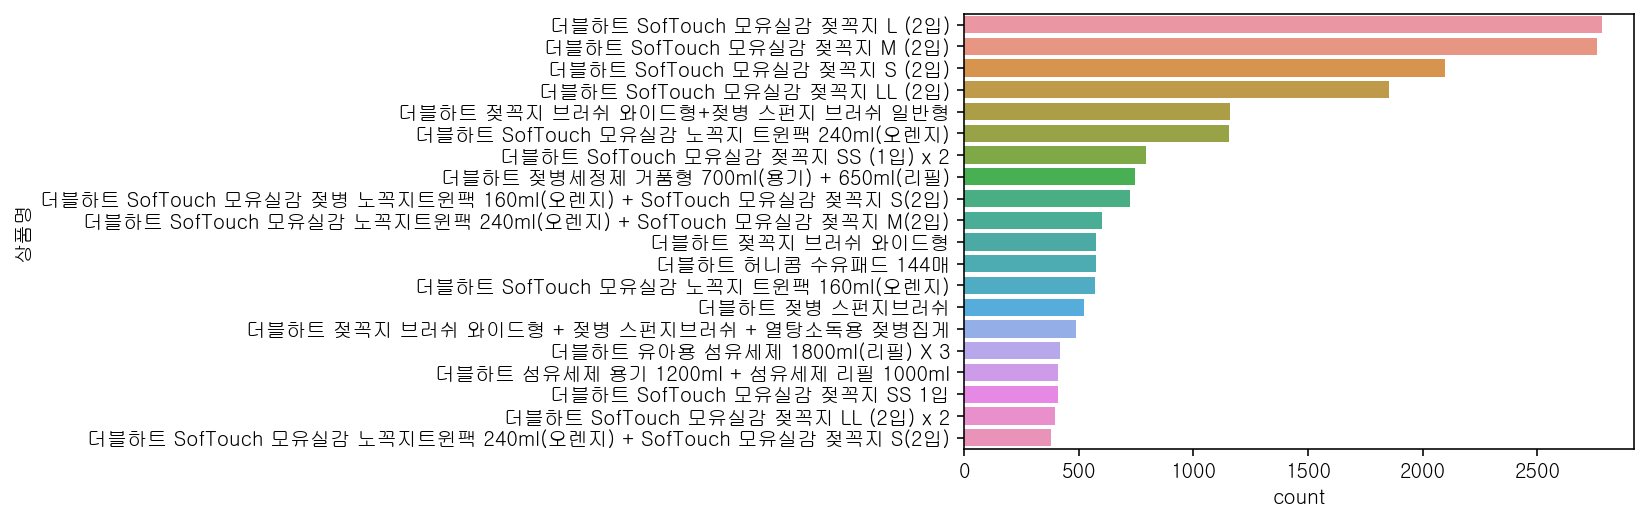

In [137]:
# 더블하트 Top20 시각화
sns.barplot(data = DBH_T20, x = 'count', y = '상품명')

<AxesSubplot:xlabel='count', ylabel='상품명'>

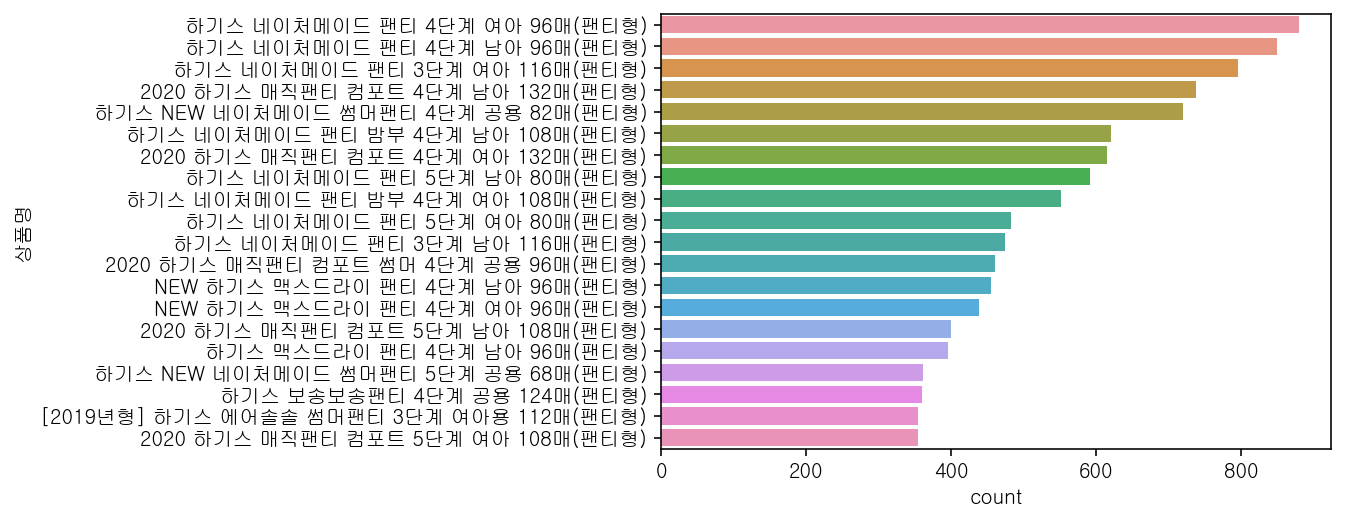

In [138]:
# 팬티 Top20 시각화
sns.barplot(data = Pan_T20, x = 'count', y = '상품명')

<AxesSubplot:xlabel='count', ylabel='상품명'>

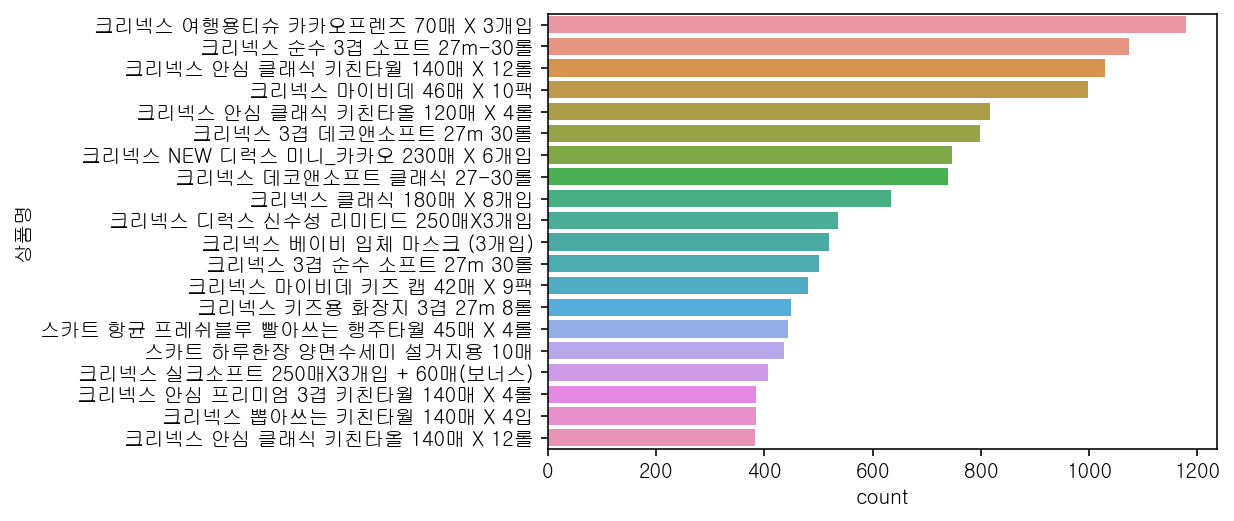

In [139]:
# FMC Top20 시각화
sns.barplot(data = FMC_T20, x = 'count', y = '상품명')

<AxesSubplot:xlabel='count', ylabel='상품명'>

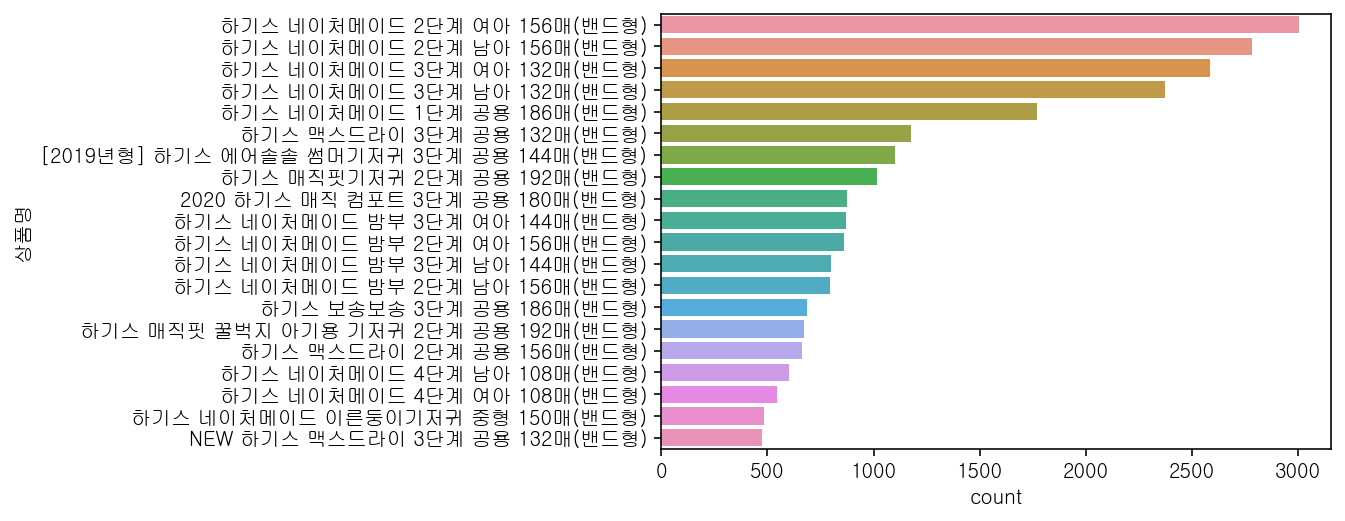

In [140]:
# 기저귀 Top20 시각화
sns.barplot(data = DIA_T20, x = 'count', y = '상품명')

<AxesSubplot:xlabel='count', ylabel='상품명'>

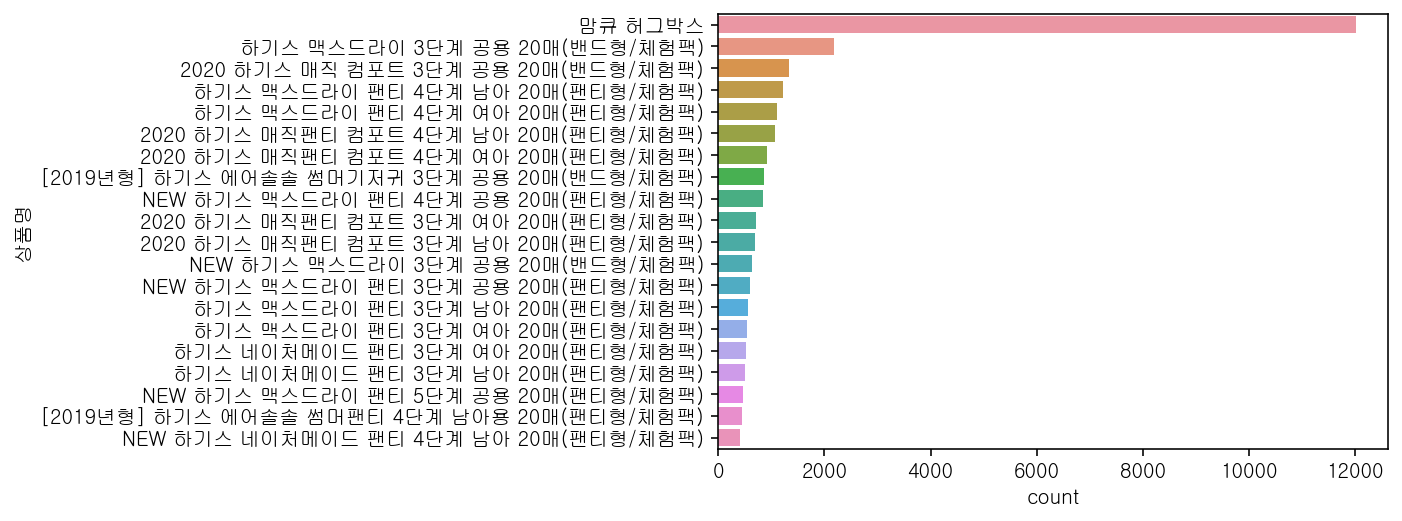

In [141]:
# 체험팩 Top20 시각화
sns.barplot(data = EXP_T20, x = 'count', y = '상품명')

<AxesSubplot:xlabel='count', ylabel='상품명'>

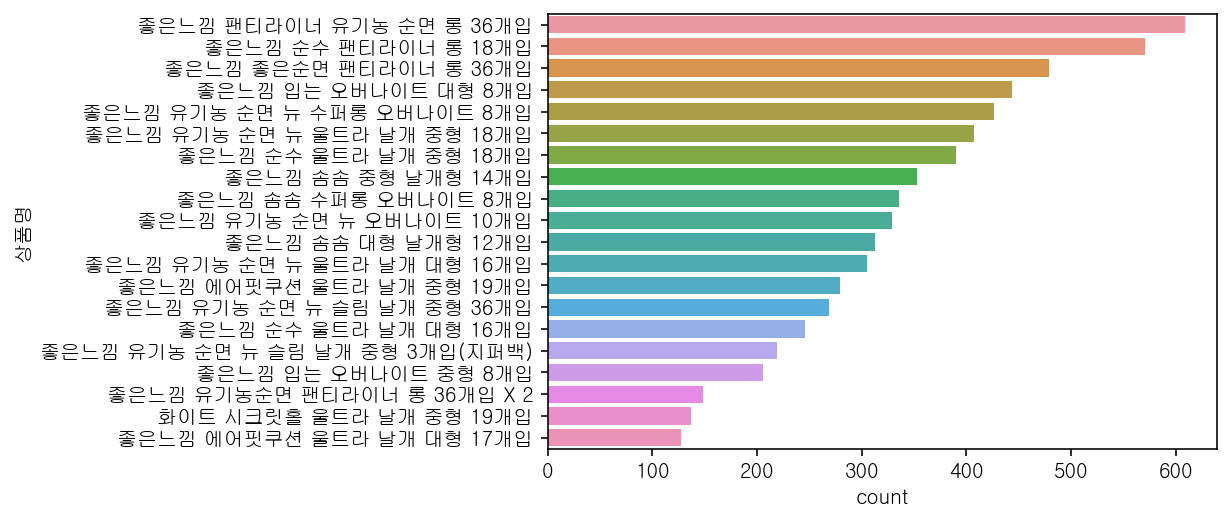

In [142]:
# FC Top20 시각화
sns.barplot(data = FC_T20, x = 'count', y = '상품명')

<AxesSubplot:xlabel='count', ylabel='상품명'>

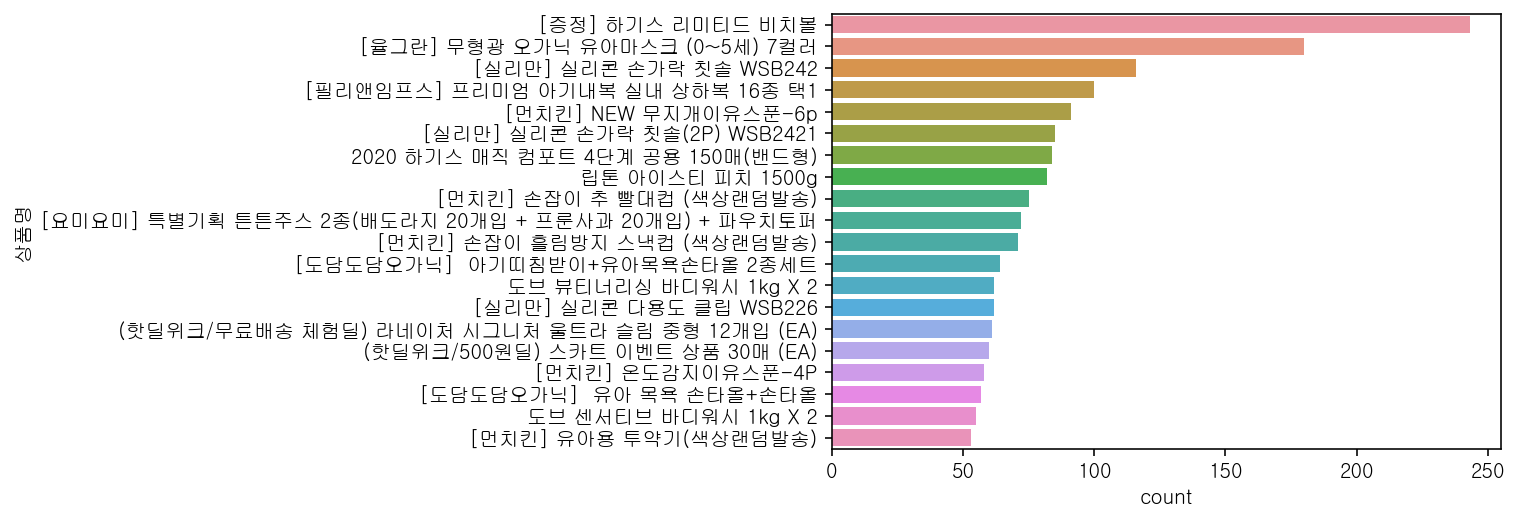

In [143]:
# 기타 Top20 시각화
sns.barplot(data = ETC_T20, x = 'count', y = '상품명')

<AxesSubplot:xlabel='count', ylabel='상품명'>

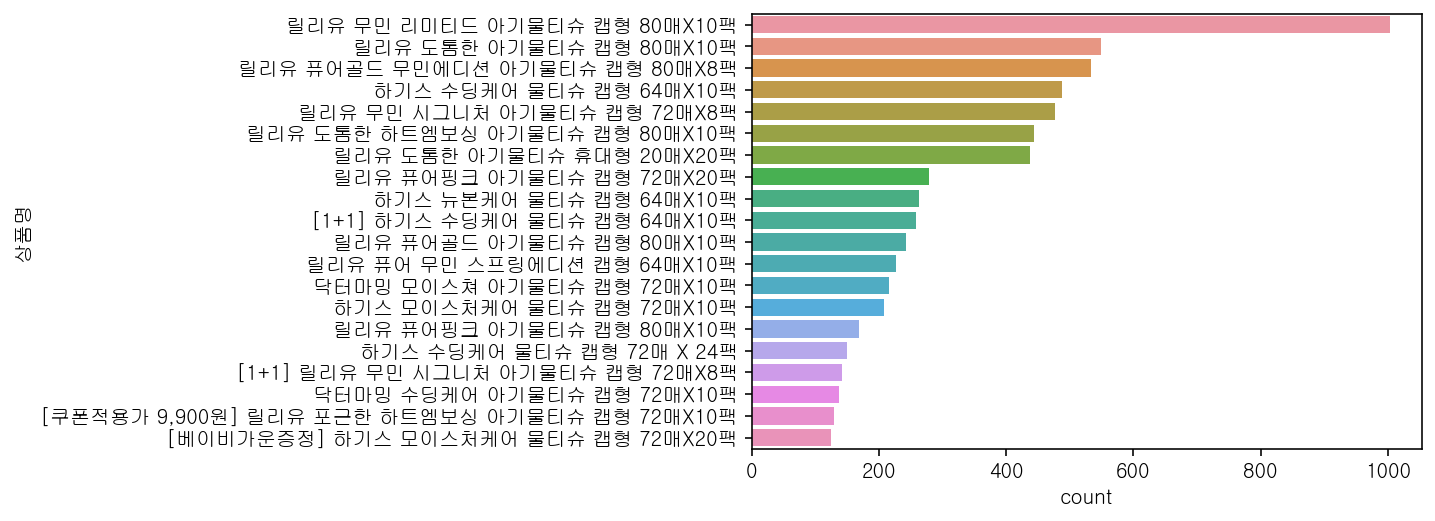

In [144]:
# 물티슈 Top20 시각화
sns.barplot(data = NAP_T20, x = 'count', y = '상품명')

<AxesSubplot:xlabel='count', ylabel='상품명'>

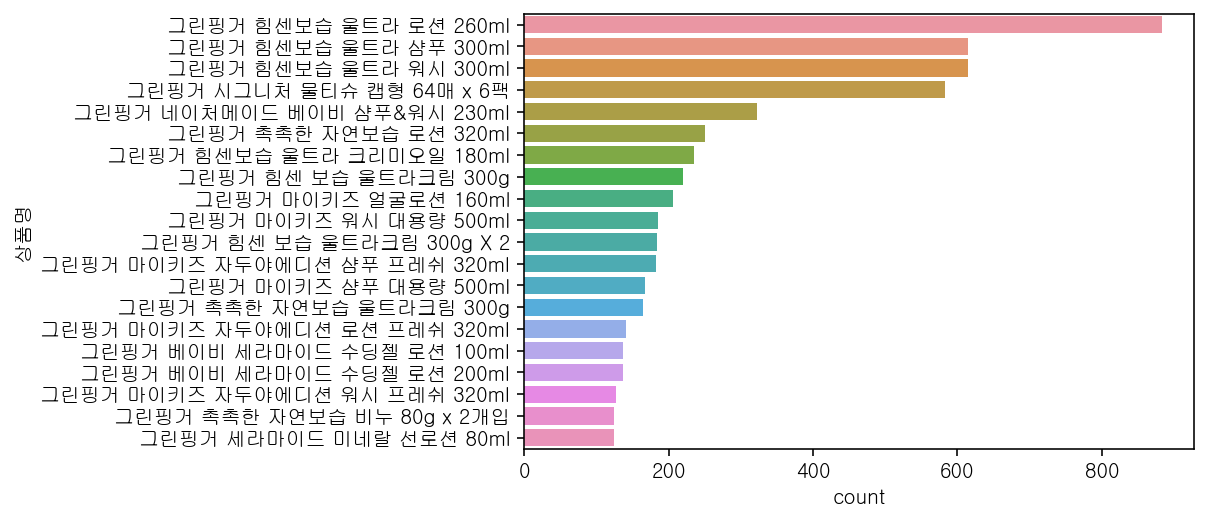

In [145]:
# SKC Top20 시각화
sns.barplot(data = SKC_T20, x = 'count', y = '상품명')

## 분기별 물품대분류 판매량

In [146]:
# 분기별 정리 위한 함수 작성
def month_div(df, start_date, end_date, name):
    select_data = df[(df.loc[:,'구매일'] >= start_date ) & (df.loc[:,'구매일'] <= end_date)]
    grouped_select_data = select_data.groupby('물품대분류').agg(name = ('상품명','count')).rename(columns = {'name' : name})

    return grouped_select_data

# 분기별 정리위한 데이터 가공
a = month_div(data, '2019-01-01','2019-03-31', '2019 1분기')
b = month_div(data, '2019-04-01','2019-06-30', '2019 2분기')
c = month_div(data, '2019-07-01','2019-09-30', '2019 3분기')
d = month_div(data, '2019-09-01','2019-12-31', '2019 4분기')
e = month_div(data, '2020-01-01','2020-03-31', '2020 1분기')
f = month_div(data, '2020-04-01','2020-06-30', '2020 2분기')

# 분기별 정리
Quarter = pd.concat([a,b,c,d,e,f], axis = 1).fillna(0)
Quarter

,2019 1분기,2019 2분기,2019 3분기,2019 4분기,2020 1분기,2020 2분기
물품대분류,,,,,,
FC,1774.0,1775.0,1551.0,3608.0,2476.0,1041
FMC,4942.0,2754.0,3019.0,6932.0,5292.0,2429
SKC,1266.0,1415.0,1746.0,3231.0,1215.0,809
기저귀,2707.0,5974.0,8648.0,11793.0,6120.0,2228
기타,467.0,608.0,1623.0,2282.0,1427.0,1188
더블하트,5137.0,7355.0,6951.0,11262.0,5490.0,2292
물티슈,1346.0,1185.0,1414.0,2422.0,1436.0,768
체험팩,2394.0,5523.0,11678.0,11944.0,4667.0,2671
팬티,1061.0,2189.0,3393.0,6898.0,5593.0,6464


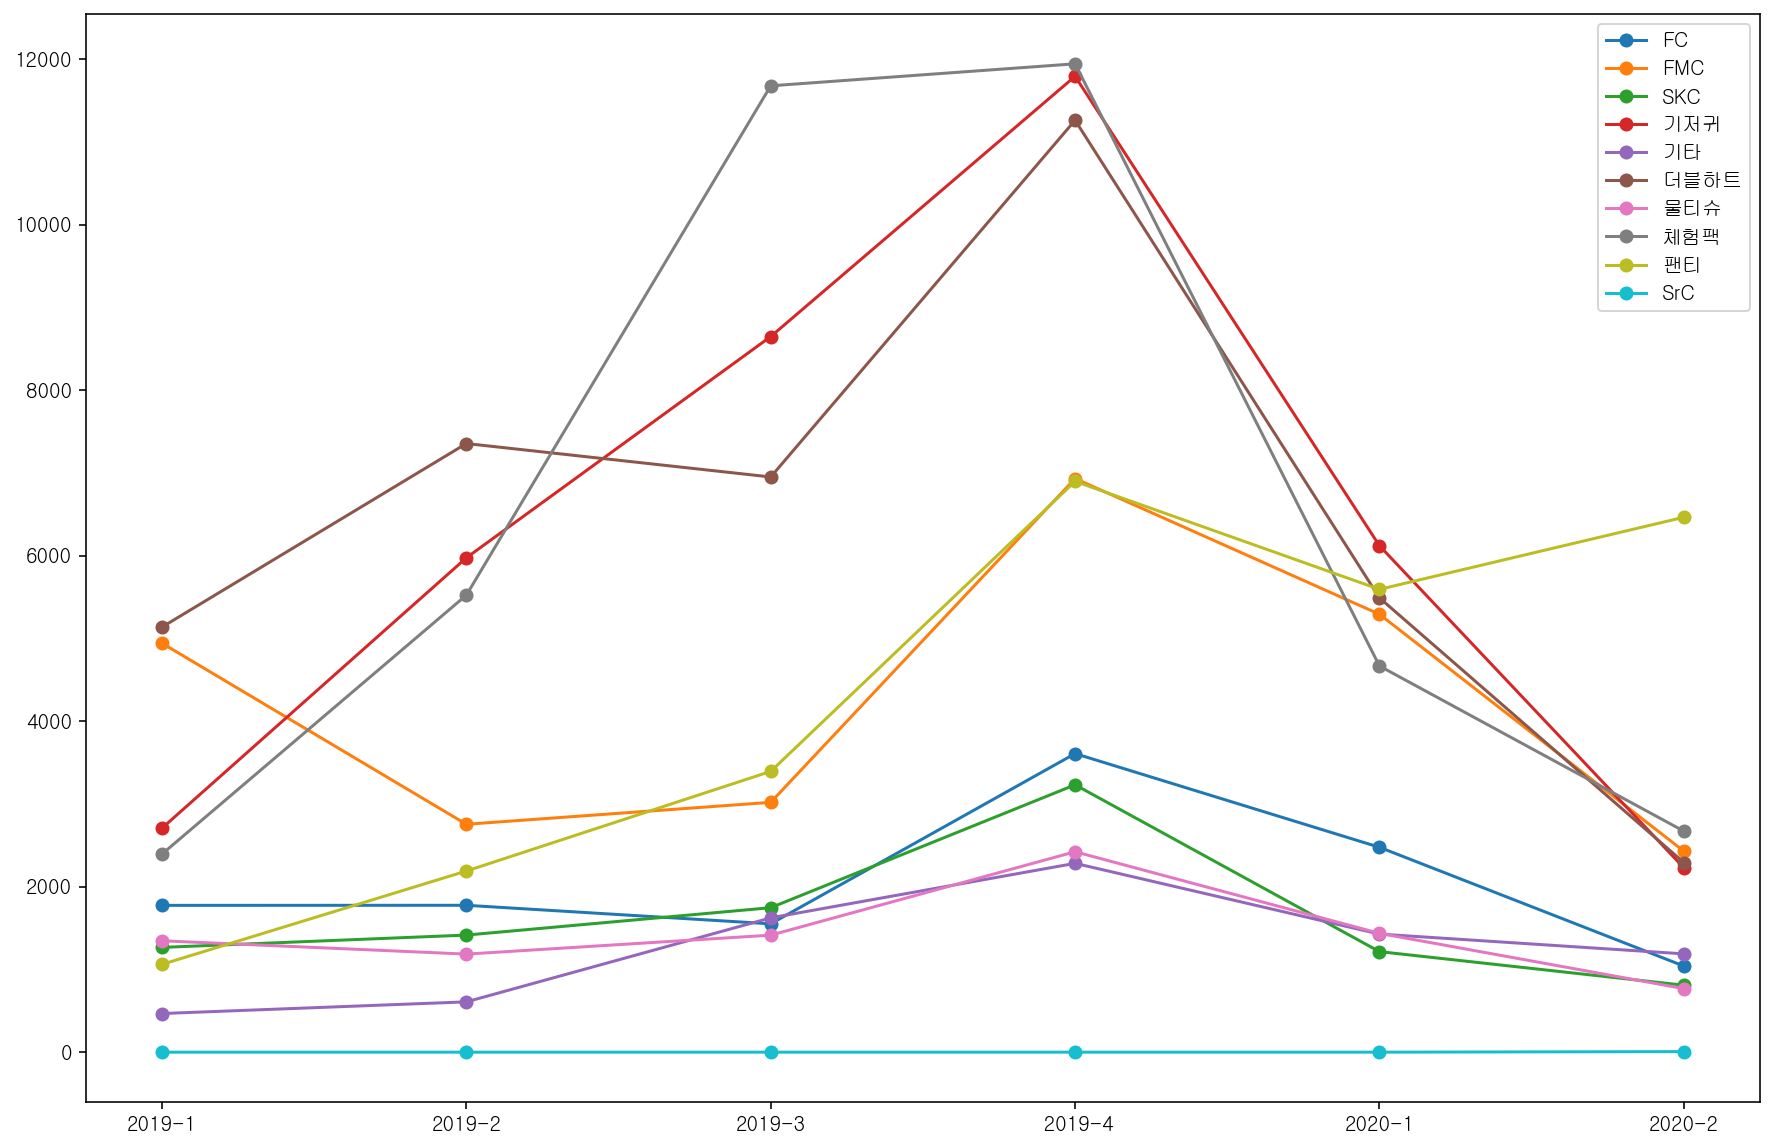

In [147]:
# 그래프 작성위한 x 축 데이터 가공
quarters = ['2019-1', '2019-2', '2019-3',' 2019-4','2020-1', '2020-2']
fc = Quarter.iloc[0,:].values
fmc = Quarter.iloc[1,:].values
skc = Quarter.iloc[2,:].values
기저귀 = Quarter.iloc[3,:].values
기타 = Quarter.iloc[4,:].values
더블하트 = Quarter.iloc[5,:].values
물티슈 = Quarter.iloc[6,:].values
체험팩 = Quarter.iloc[7,:].values
팬티 = Quarter.iloc[8,:].values
src = Quarter.iloc[9,:].values

# 다중선형그래프 작성
plt.figure(figsize=(15, 10))

plt.plot(quarters, fc, label = 'FC', marker = 'o')
plt.plot(quarters, fmc, label = 'FMC', marker = 'o')
plt.plot(quarters, skc, label = 'SKC', marker = 'o')
plt.plot(quarters, 기저귀, label = '기저귀', marker = 'o')
plt.plot(quarters, 기타, label = '기타', marker = 'o')
plt.plot(quarters, 더블하트, label = '더블하트', marker = 'o')
plt.plot(quarters, 물티슈, label = '물티슈', marker = 'o')
plt.plot(quarters, 체험팩, label = '체험팩', marker = 'o')
plt.plot(quarters, 팬티, label = '팬티', marker = 'o')
plt.plot(quarters, src, label = 'SrC', marker = 'o')

plt.legend()

## 등급, 구매금액별 구매예측

In [148]:
# ID 당 구매연월 별 구매금액 

user_purchas = pd.pivot_table(data = data, index = 'ID', columns = '구매연월', values = '구매금액', aggfunc = 'sum', fill_value = 0)
user_purchas

구매연월,201901,201902,201903,201904,201905,201906,201907,201908,201909,201910,201911,201912,202001,202002,202003,202004,202005,202006,202007,202008
ID,,,,,,,,,,,,,,,,,,,,
2.018123e+14,0,0,0,0,25800,0,0,0,0,0,0,0,0,51200,0,0,0,0,0,0
2.018123e+14,0,5610,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2.018123e+14,0,0,0,0,59520,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2.018123e+14,0,0,0,0,50640,0,101280,0,0,0,0,0,0,0,0,0,0,0,0,0
2.018123e+14,27920,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2.019123e+14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,48900,0,0
2.019123e+14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,124200,0,0,0,0
2.019123e+14,0,0,0,0,0,0,0,0,0,0,0,52320,0,59820,0,0,0,0,99800,0


In [162]:
def month_div(df, start_date, end_date):
    select_data = df[(df.loc[:,'구매일'] >= start_date ) & (df.loc[:,'구매일'] <= end_date)]
    grouped_select_data = select_data.groupby('ID').agg(sum_purchase = ('구매금액','sum'))
    # user_count = len(grouped_select_data[grouped_select_data['sum_purchase'] > 100000].index)
    return grouped_select_data

In [165]:
data.columns

Index(['구매일', 'ID', '구매금액', '결제금액', '물품대분류', '상품명', '성별', '결혼유무', '거주지역', '연령',
       '결제등록카드', '유입경로', '자녀여부', '구매연월', '구매시자녀월령', '자녀연령대'],
      dtype='object')

In [166]:
# 머신러닝 모델 위한 데이터 가공
user_grade = month_div(data, '2019-01', '2020-08')

def grade(x):
    if x > 100000:
        result = 1
    elif x > 70000:
        result = 2
    elif x > 50000:
        result = 3
    else:
        result = 0
    return result

user_grade['등급'] = user_grade['sum_purchase'].apply(grade)
grade_merge = data.merge(user_grade, on = 'ID', how='outer')

grade_merge['등급'] = grade_merge['등급'].fillna('0')
grade_merge = grade_merge.drop(['sum_purchase'], axis=1)

grade_merge['등급'] = grade_merge['등급'].astype('int')
grade_merge['할인가격'] = data['구매금액'] - data['결제금액']
grade_merge['구매시월령'] = data['구매시자녀월령']

In [198]:
# 레그레이션 모델 적용

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 

target = ['구매시월령','구매금액','결혼유무','연령','등급']

dataset = grade_merge[target]
dataset = pd.get_dummies(dataset)

model = LinearRegression()

X = dataset.drop('등급', axis = 1)
Y = dataset['등급']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3)

model = LinearRegression()
model.fit(X_train, Y_train)

# 레그레이션 모델 적용
model.score(X_test, Y_test)


0.057274989284084366

훈련 정확도 : 0.6459687347897043
테스트 정확도 : 0.6399832985386221


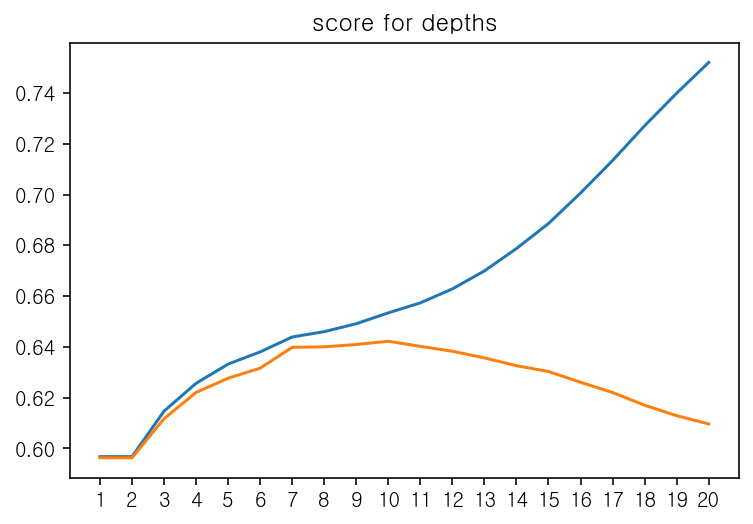

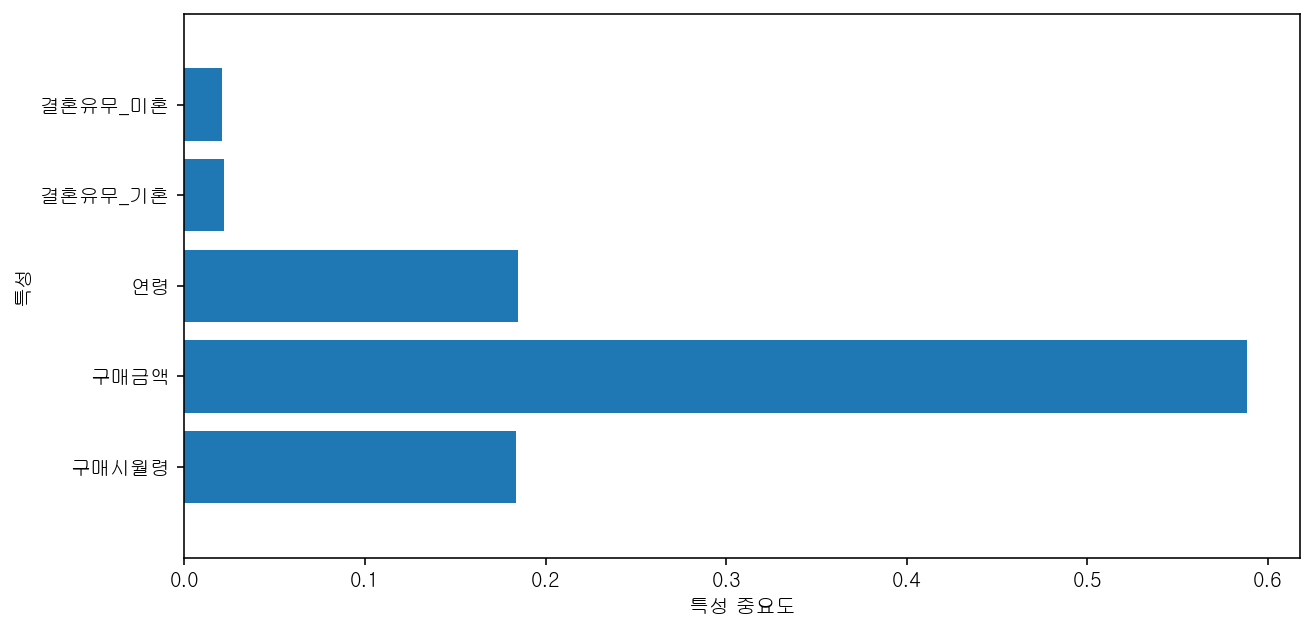

In [199]:
# 의사결정나무

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X = dataset.drop('등급', axis = 1)
Y = dataset['등급']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 0)

model = DecisionTreeClassifier(max_depth = 8)
model.fit(X_train, Y_train)

train_accuracy = model.score(X_train, Y_train)
test_accuracy = model.score(X_test, Y_test)
print(f'훈련 정확도 : {train_accuracy}')
print(f'테스트 정확도 : {test_accuracy}')

# 의사결정나무 정확도 계산
train_score=[]
test_score=[]
for i in range(1,21):
    model=DecisionTreeClassifier(max_depth=i,random_state=0)
    model.fit(X_train,Y_train)
    train_score.append(model.score(X_train,Y_train))
    test_score.append(model.score(X_test,Y_test))
plt.figure()
plt.title('score for depths')
plt.plot(range(1,21),train_score)
plt.plot(range(1,21),test_score)
plt.xticks(range(1,21))
plt.show()

# 특성 중요도 출력
importance = pd.DataFrame({'feature_names':X.columns, "특성 중요도":
                          model_dt.feature_importances_})
# importance.sort_values(by = "특성 중요도",ascending = False)
importance[importance['특성 중요도']!=0.00].sort_values(by = "특성 중요도",ascending = False)

# 의사결정나무의 특성 중요도 시각화 (내림차순되어있지 않음)
import numpy as np
def plot_feature_importances_(model):
    n_features = X.shape[1]
    plt.figure(figsize=(10,5))
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)

plot_feature_importances_(model)

In [184]:
# 모델 예측 실행
구매금액 = 20000
구매시월령 = 10
연령 = 33
결혼유무_미혼 = 0
결혼유무_기혼 = 0

input_data = [구매금액,연령,구매시월령,결혼유무_미혼,결혼유무_기혼]

print(model.predict([input_data]))
print(model.predict_proba([input_data]))

pred_dt = model.predict(X_test)

from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(Y_test, pred_dt)
print(conf_matrix)

from sklearn.metrics import classification_report
class_report = classification_report(Y_test, pred_dt)
print(class_report)

# Accuracy (정확도)
# Confusion Matrix (오차행렬)
# Precision (정밀도)
# Recall (재현율)
# F1 Score (F1스코어)

[1]
[[0. 1. 0. 0.]]
[[14445  4994   441   477]
 [ 6650 21450   729   796]
 [ 1524  2199   270   146]
 [ 1875  3411   132   336]]
              precision    recall  f1-score   support

           0       0.59      0.71      0.64     20357
           1       0.67      0.72      0.70     29625
           2       0.17      0.07      0.09      4139
           3       0.19      0.06      0.09      5754

    accuracy                           0.61     59875
   macro avg       0.41      0.39      0.38     59875
weighted avg       0.56      0.61      0.58     59875



c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



랜덤포레스트 훈련 정확도는 0.634 입니다.
랜덤포레스트 테스트 정확도는 0.632 입니다.


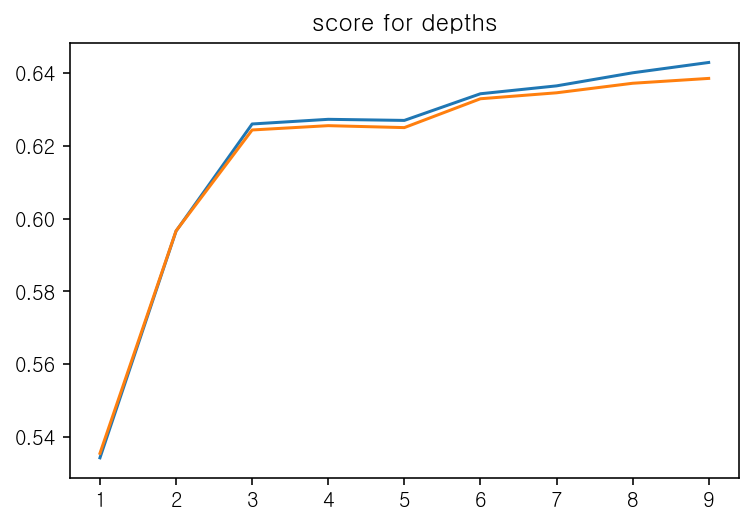

,feature_names,특성 중요도
1,구매금액,0.811629
0,구매시월령,0.173898
2,연령,0.012428
4,결혼유무_미혼,0.001025
3,결혼유무_기혼,0.001021


In [200]:
# 랜덤포레스트
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

X = dataset.drop('등급', axis = 1)
Y = dataset['등급'].ravel()

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 100)

scaler = StandardScaler()
scaler.fit(X_train)

x_train_std = scaler.transform(X_train)
x_test_std = scaler.transform(X_test)

rf_clf = RandomForestClassifier(max_depth = 6,
                               n_estimators=100)

rf_clf.fit(x_train_std, Y_train)

# 정확도 계산
rf_train_score = rf_clf.score(x_train_std, Y_train)
rf_test_score = rf_clf.score(x_test_std, Y_test)
print(f'랜덤포레스트 훈련 정확도는 {round(rf_train_score,3)} 입니다.')
print(f'랜덤포레스트 테스트 정확도는 {round(rf_test_score,3)} 입니다.')

# 랜덤포레스트의 특성 중요도 시각화 
train_score=[]
test_score=[]
for i in range(1,10):
    model=RandomForestClassifier(max_depth=i,random_state=0)
    model.fit(X_train,Y_train)
    train_score.append(model.score(X_train,Y_train))
    test_score.append(model.score(X_test,Y_test))
plt.figure()
plt.title('score for depths')
plt.plot(range(1,10),train_score)
plt.plot(range(1,10),test_score)
plt.xticks(range(1,10))
plt.show()

# 특성 중요도
importance = pd.DataFrame({'feature_names':X.columns, "특성 중요도":
                          model.feature_importances_})
# importance.sort_values(by = "특성 중요도",ascending = False)

importance[importance['특성 중요도']!=0.00].sort_values(by = "특성 중요도",ascending = False)


In [201]:
# 모델 예측 실행
pred_rf = rf_clf.predict(x_test_std)

from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(Y_test, pred_rf)
print(conf_matrix)

from sklearn.metrics import classification_report
class_report = classification_report(Y_test, pred_rf)
print(class_report)

[[15968  4251     0     0]
 [ 7978 21871     0     0]
 [ 1885  2311     0     0]
 [ 2138  3473     0     0]]
              precision    recall  f1-score   support

           0       0.57      0.79      0.66     20219
           1       0.69      0.73      0.71     29849
           2       0.00      0.00      0.00      4196
           3       0.00      0.00      0.00      5611

    accuracy                           0.63     59875
   macro avg       0.31      0.38      0.34     59875
weighted avg       0.53      0.63      0.58     59875



c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



그레디언트부스팅 훈련 정확도는 0.64 입니다.
그레디언트부스팅 테스트 정확도는 0.64 입니다.


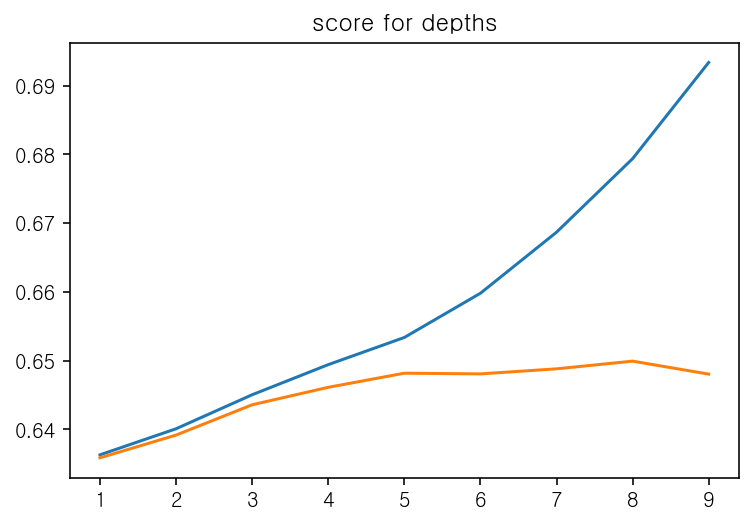

,feature_names,특성 중요도
1,구매금액,0.733693
0,구매시월령,0.182805
2,연령,0.070391
4,결혼유무_미혼,0.006777
3,결혼유무_기혼,0.006334


In [202]:
# 그레디언트 부스팅 적용
from sklearn.ensemble import GradientBoostingClassifier


gbrt = GradientBoostingClassifier(max_depth = 2, learning_rate = 0.11)
gbrt.fit(x_train_std, Y_train)

# 정확도 계산
gbrt_train_score = gbrt.score(x_train_std, Y_train)
gbrt_test_score = gbrt.score(x_test_std, Y_test)
print(f'그레디언트부스팅 훈련 정확도는 {round(gbrt_train_score,2)} 입니다.')
print(f'그레디언트부스팅 테스트 정확도는 {round(gbrt_test_score,2)} 입니다.')

# 그레디언트 부스팅의 특성 중요도 시각화 
train_score=[]
test_score=[]
for i in range(1,10):
    model=GradientBoostingClassifier(max_depth=i,random_state=0)
    model.fit(X_train,Y_train)
    train_score.append(model.score(X_train,Y_train))
    test_score.append(model.score(X_test,Y_test))
plt.figure()
plt.title('score for depths')
plt.plot(range(1,10),train_score)
plt.plot(range(1,10),test_score)
plt.xticks(range(1,10))
plt.show()

# 특성 중요도
importance = pd.DataFrame({'feature_names':X.columns, "특성 중요도":
                          model.feature_importances_})
# importance.sort_values(by = "특성 중요도",ascending = False)

importance[importance['특성 중요도']!=0.00].sort_values(by = "특성 중요도",ascending = False)


In [203]:
# 모델 예측 실행
pred_gb = gbrt.predict(x_test_std)

conf_matrix = confusion_matrix(Y_test, pred_gb)
print(conf_matrix)

class_report = classification_report(Y_test, pred_gb)
print(class_report)

[[15173  5046     0     0]
 [ 6736 23082    31     0]
 [ 1709  2457    30     0]
 [ 1971  3639     0     1]]
              precision    recall  f1-score   support

           0       0.59      0.75      0.66     20219
           1       0.67      0.77      0.72     29849
           2       0.49      0.01      0.01      4196
           3       1.00      0.00      0.00      5611

    accuracy                           0.64     59875
   macro avg       0.69      0.38      0.35     59875
weighted avg       0.66      0.64      0.58     59875



## 고객등급 분류 - 지난 3개월간 결제금액 기준

In [207]:
# 예측 위한 데이터 가공
user_purchas = pd.pivot_table(data = grade_merge, index = 'ID', columns = '구매연월', values = '구매금액', aggfunc='count', fill_value=0)
user_purchas[user_purchas.values > 1]

total_column_count = len(user_purchas.columns)    # 20
set_column_count = 3
result_df = pd.DataFrame()

for i in range(total_column_count - set_column_count):
    selected_df = user_purchas.iloc[:,i:i+4]
    print(selected_df.columns)
    selected_df.columns = ['3달전','2달전','1달전','구매여부']
    result_df = pd.concat([result_df, selected_df])
    
predict_data = pd.merge(result_df.reset_index(),
                        grade_merge['ID'],
                        on = 'ID')

Index(['201901', '201902', '201903', '201904'], dtype='object', name='구매연월')
Index(['201902', '201903', '201904', '201905'], dtype='object', name='구매연월')
Index(['201903', '201904', '201905', '201906'], dtype='object', name='구매연월')
Index(['201904', '201905', '201906', '201907'], dtype='object', name='구매연월')
Index(['201905', '201906', '201907', '201908'], dtype='object', name='구매연월')
Index(['201906', '201907', '201908', '201909'], dtype='object', name='구매연월')
Index(['201907', '201908', '201909', '201910'], dtype='object', name='구매연월')
Index(['201908', '201909', '201910', '201911'], dtype='object', name='구매연월')
Index(['201909', '201910', '201911', '201912'], dtype='object', name='구매연월')
Index(['201910', '201911', '201912', '202001'], dtype='object', name='구매연월')
Index(['201911', '201912', '202001', '202002'], dtype='object', name='구매연월')
Index(['201912', '202001', '202002', '202003'], dtype='object', name='구매연월')
Index(['202001', '202002', '202003', '202004'], dtype='object', name='구매연월')

In [208]:
# 리그레이션 모델
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 

model = LinearRegression()

X = predict_data.drop(['구매여부','ID'], axis = 1)
Y = predict_data['구매여부']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3)

model = LinearRegression()
model.fit(X_train, Y_train)

# 정확도 계산
model.score(X_test, Y_test)

0.2121884785317898

In [209]:
# 의사결정 나무
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X = predict_data.drop('구매여부', axis = 1)
Y = predict_data['구매여부']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 100)

model = DecisionTreeClassifier(max_depth = 8)
model.fit(X_train, Y_train)

# 정확도 계산
train_accuracy = model.score(X_train, Y_train)
test_accuracy = model.score(X_test, Y_test)
print(f'훈련 정확도 : {train_accuracy}')
print(f'테스트 정확도 : {test_accuracy}')


훈련 정확도 : 0.7904605275623074
테스트 정확도 : 0.7899111284893808


훈련 정확도 : 0.7890121290741997
테스트 정확도 : 0.7889532496163573


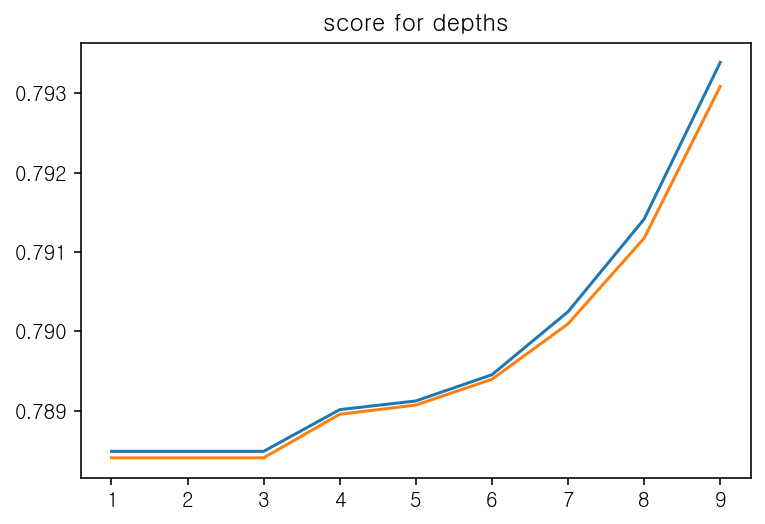

,feature_names,특성 중요도
3,1달전,0.452742
2,2달전,0.294011
1,3달전,0.156553
0,ID,0.096693


In [210]:
# 랜덤포레스트
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier


X = predict_data.drop('구매여부', axis = 1)
Y = predict_data['구매여부']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 50)

scaler = StandardScaler()
scaler.fit(X_train)

x_train_std = scaler.transform(X_train)
x_test_std = scaler.transform(X_test)

model = RandomForestClassifier(max_depth = 4,
                               n_estimators=150)
model.fit(x_train_std, Y_train)

# 정확도 계산
train_accuracy = model.score(x_train_std, Y_train)
test_accuracy = model.score(x_test_std, Y_test)

print(f'훈련 정확도 : {train_accuracy}')
print(f'테스트 정확도 : {test_accuracy}')

# 랜덤포레스트의 특성 중요도 시각화 
train_score=[]
test_score=[]
for i in range(1,10):
    model=RandomForestClassifier(max_depth=i,random_state=0)
    model.fit(x_train_std,Y_train)
    train_score.append(model.score(x_train_std,Y_train))
    test_score.append(model.score(x_test_std,Y_test))
plt.figure()
plt.title('score for depths')
plt.plot(range(1,10),train_score)
plt.plot(range(1,10),test_score)
plt.xticks(range(1,10))
plt.show()

importance = pd.DataFrame({'feature_names':X.columns, "특성 중요도":
                          model.feature_importances_})
# importance.sort_values(by = "특성 중요도",ascending = False)

importance[importance['특성 중요도']!=0.00].sort_values(by = "특성 중요도",ascending = False)


## 구매횟수, 구매금액별 회원 군집화

In [211]:
user_grade = month_div(data, '2019-01', '2020-01')

grade_merge['등급'].unique()
grade_merge['등급'].astype('int')
grade_merge.columns
aa = grade_merge.groupby('ID').agg(count = ('구매금액','count'))
aa
grade_merge2 = pd.merge(grade_merge,aa,on='ID',how='inner')
grade_merge2['구매횟수'] = grade_merge2['count']
grade_merge2


,구매일,ID,구매금액,결제금액,물품대분류,상품명,성별,결혼유무,거주지역,연령,...,유입경로,자녀여부,구매연월,구매시자녀월령,자녀연령대,등급,할인가격,구매시월령,count,구매횟수
0,2019-05-06,2.018123e+14,25800,16314,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),여,기혼,인천,37.0,...,인스타그램,Yes,201905,4.0,100일후,2,9486,4.0,2,2
1,2020-02-20,2.018123e+14,51200,37769,팬티,NEW 하기스 맥스드라이 팬티 5단계 남아 80매(팬티형),여,기혼,인천,37.0,...,인스타그램,Yes,202002,14.0,유아기,2,13431,14.0,2,2
2,2019-02-28,2.018123e+14,5610,3800,FMC,크리넥스 키즈용 화장지 3겹 27m 8롤,여,기혼,제주,33.0,...,검색광고,Yes,201902,10.0,영아기,0,1810,10.0,1,1
3,2019-05-13,2.018123e+14,59520,47922,기저귀,하기스 네이처메이드 밤부 3단계 여아 144매(밴드형),여,기혼,부산,32.0,...,네이버블로그,Yes,201905,66.0,아동,3,11598,66.0,1,1
4,2019-05-10,2.018123e+14,50640,39788,기저귀,하기스 에어솔솔 썸머기저귀 3단계 공용 144매(밴드형),여,미혼,경남,34.0,...,지인추천,No,201905,5.0,100일후,1,10852,5.0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199578,2020-02-01,2.019123e+14,53920,45971,팬티,하기스 네이처메이드 팬티 3단계 여아 116매(팬티형),여,기혼,충북,26.0,...,검색광고,Yes,202002,8.0,영아기,1,7949,8.0,4,4
199579,2020-02-04,2.019123e+14,5900,5841,체험팩,NEW 하기스 맥스드라이 팬티 3단계 공용 20매(팬티형/체험팩),여,기혼,충북,26.0,...,검색광고,Yes,202002,8.0,영아기,1,59,8.0,4,4
199580,2020-07-18,2.019123e+14,99800,73588,팬티,하기스 NEW 네이처메이드 썸머팬티 4단계 공용 82매(팬티형),여,기혼,충북,26.0,...,검색광고,Yes,202007,13.0,유아기,1,26212,13.0,4,4
199581,2019-12-29,2.019123e+14,51000,36579,팬티,2020 하기스 맥스드라이 팬티 4단계 공용 96매(팬티형),여,기혼,경기,32.0,...,인스타그램,Yes,201912,10.0,영아기,3,14421,10.0,1,1


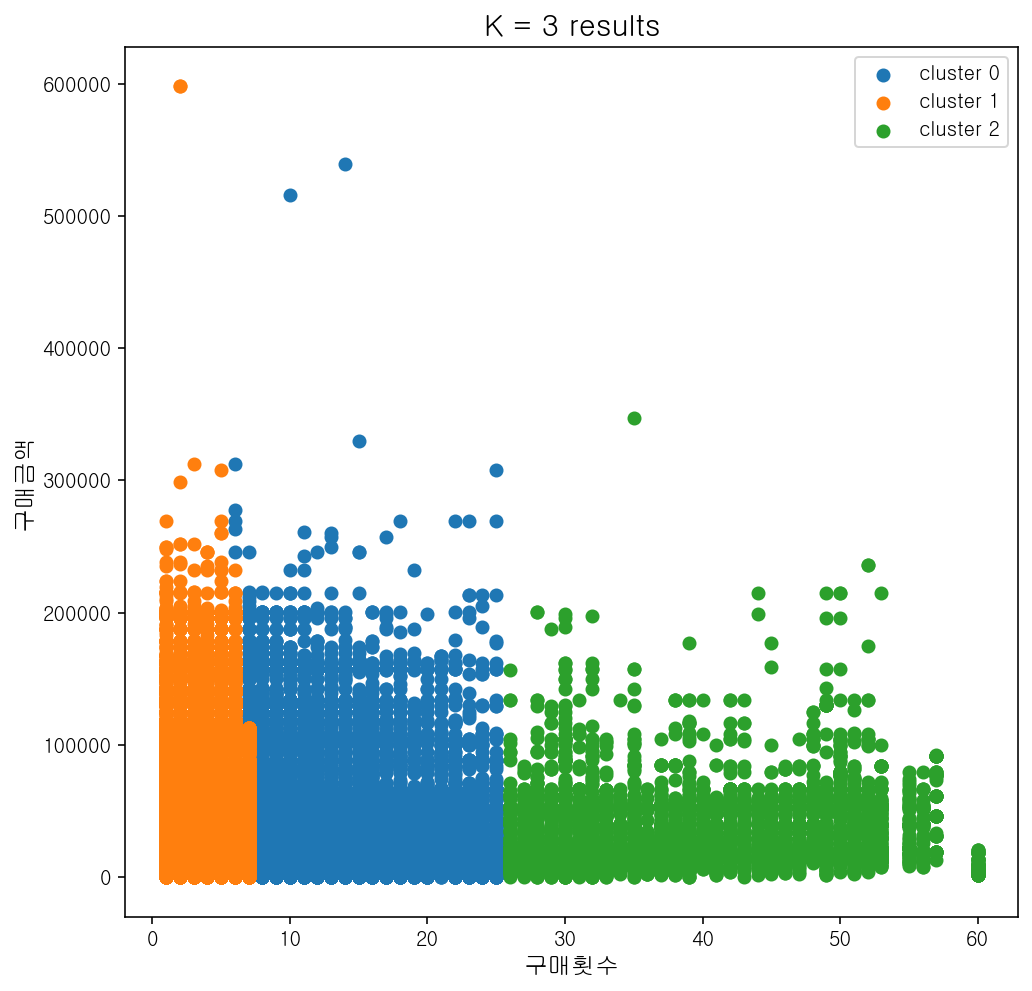

In [212]:
# 군집화 시각화
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

clustering = grade_merge2[['구매횟수','구매금액']]
scaler = MinMaxScaler()
data_scale = scaler.fit_transform(clustering)
k = 3
model = KMeans(n_clusters = k, random_state = 10)
model.fit(data_scale)
grade_merge2['cluster'] = model.fit_predict(data_scale)
plt.figure(figsize = (8, 8))
for i in range(k):
    plt.scatter(grade_merge2.loc[grade_merge2['cluster'] == i, '구매횟수'],
                grade_merge2.loc[grade_merge2['cluster'] == i, '구매금액'],
                label = 'cluster ' + str(i))
plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('구매횟수', size = 12)
plt.ylabel('구매금액', size = 12)
plt.show()


## 분기별 판매량 - 다음 분기 수요량 예측

In [213]:
# 리그레이션 모델 작성 위한 데이터 가공 함수 작성
def change_class(물품대분류):
    if 물품대분류 == "FC":
        return 0
    elif 물품대분류 == "FMC":
        return 1
    elif 물품대분류 == "SKC":
        return 2
    elif 물품대분류 == "기저귀":
        return 3
    elif 물품대분류 == "기타":
        return 4
    elif 물품대분류 == "더블하트":
        return 5
    elif 물품대분류 == "물티슈":
        return 6
    elif 물품대분류 == "체험팩":
        return 7
    elif 물품대분류 == "팬티":
        return 8
    else:
        return 9
# FC : 0
# FMC : 1
# SKC : 2
# 기저귀 : 3
# 기타 : 4
# 더블하트 : 5
# 물티슈 : 6
# 체험팩 : 7
# 팬티 : 8
# Src : 9

def change_sex(성별):
    if 성별 == "여":
        return 1
    else:
        return 0
# 여 : 1
# 남 : 0

def change_married(결혼유무):
    if 결혼유무 == "기혼":
        return 1
    else:
        return 0
# 기혼 : 1
# 미혼 : 0

def change_adress(거주지역):
    if 거주지역 == "서울":
        return 0
    elif 거주지역 == "경기":
        return 1
    elif 거주지역 == "인천":
        return 2
    elif 거주지역 == "충북":
        return 3
    elif 거주지역 == "충남":
        return 4
    elif 거주지역 == "대전":
        return 5
    elif 거주지역 == "전북":
        return 6
    elif 거주지역 == "전남":
        return 7
    elif 거주지역 == "광주":
        return 8
    elif 거주지역 == "경북":
        return 9
    elif 거주지역 == "경남":
        return 10
    elif 거주지역 == "부산":
        return 11
    elif 거주지역 == "대구":
        return 12
    elif 거주지역 == "강원":
        return 13
    else:
        return 14
# 서울 : 0
# 경기 : 1
# 인천 : 2
# 충북 : 3
# 충남 : 4
# 대전 : 5
# 전북 : 6
# 전남 : 7
# 광주 : 8
# 경북 : 9
# 경남 : 10
# 부산 : 11
# 대구 : 12
# 강원 : 13
# 제주 : 14

def change_child(자녀여부):
    if 자녀여부 == "Yes":
        return 1
    else:
        return 0
# Yes : 1
# No : 0

def change_inflow(유입경로):
    if 유입경로 == "인스타그램":
        return 0
    elif 유입경로 == "검색광고":
        return 1
    elif 유입경로 == "네이버블로그":
        return 2
    elif 유입경로 == "지인추천":
        return 3
    elif 유입경로 == "직접검색":
        return 4
    elif 유입경로 == "네이버카페":
        return 5
    elif 유입경로 == "오픈마켓":
        return 6
    elif 유입경로 == "페이스북":
        return 7
    elif 유입경로 == "매장쿠폰":
        return 8
    else:
        return 9
# 인스타그램 : 0
# 검색광고 : 1
# 네이버블로그 : 2
# 지인추천 : 3
# 직접검색 : 4
# 네이버카페 : 5
# 오픈마켓 : 6
# 페이스북 : 7
# 매장쿠폰 : 8
# 이마트 : 9

def change_card(결제등록카드):
    if 결제등록카드 == "국민은행":
        return 0
    elif 결제등록카드 == "하나은행":
        return 1
    elif 결제등록카드 == "기업은행":
        return 2
    elif 결제등록카드 == "신한은행":
        return 3
    elif 결제등록카드 == "광주은행":
        return 4
    elif 결제등록카드 == "BC카드":
        return 5
    elif 결제등록카드 == "우리은행":
        return 6
    elif 결제등록카드 == "농협회원조합":
        return 7
    elif 결제등록카드 == "신협중앙회":
        return 8
    elif 결제등록카드 == "롯데카드":
        return 9
    elif 결제등록카드 == "대구은행":
        return 10
    elif 결제등록카드 == "국민카드":
        return 11
    elif 결제등록카드 == "농협중앙회":
        return 12
    elif 결제등록카드 == "새마을금고":
        return 13
    elif 결제등록카드 == "우체국":
        return 14
    elif 결제등록카드 == "SC제일은행":
        return 15
    elif 결제등록카드 == "현대카드":
        return 16
    elif 결제등록카드 == "신한카드":
        return 17
    elif 결제등록카드 == "삼성카드":
        return 18
    elif 결제등록카드 == "외환은행":
        return 19
    elif 결제등록카드 == "부산은행":
        return 20
    elif 결제등록카드 == "씨티은행":
        return 21
    elif 결제등록카드 == "미래에셋증권":
        return 22
    else:
        return 23
# 국민은행 : 0
# 하나은행 : 1
# 기업은행 : 2
# 신한은행 : 3
# 광주은행 : 4
# BC카드 : 5
# 우리은행 : 6
# 농협회원조합 : 7
# 신협중앙회 : 8
# 롯데카드 : 9
# 대구은행 : 10
# 국민카드 : 11
# 농협중앙회 : 12
# 새마을금고 : 13
# 우체국 : 14
# SC제일은행 : 15
# 현대카드 : 16
# 신한카드 : 17
# 삼성카드 : 18
# 외환은행 : 19
# 부산은행 : 20
# 씨티은행 : 21
# 미래에셋증권 : 22
# 경남은행 : 23

In [214]:
# 필요한 columns 선별
data2 = data.drop(['결제금액', '상품명', '물품대분류', '성별', '자녀연령대'], axis = 1)

# 머신러닝 x 값 위한 데이터 가공
# data2["성별"] = data2['성별'].apply(change_sex)
data2["결혼유무"] = data2['결혼유무'].apply(change_married)
data2["거주지역"] = data2['거주지역'].apply(change_adress)
data2["자녀여부"] = data2['자녀여부'].apply(change_child)
data2["유입경로"] = data2['유입경로'].apply(change_inflow)
data2['결제등록카드'] = data2['결제등록카드'].apply(change_card)

data2['연령'] = data2['연령'].astype('int64')
data2['구매시자녀월령'] = data2['구매시자녀월령'].astype('int64')
data2['구매일'] = data2['구매일'].astype('str')
data2['구매일'] = data2['구매일'].str.replace('-','').astype('int64')

# 러닝머신 y 값 위한 데이터 가공
data3 = data[['물품대분류']]
data3['물품대분류'] = data3['물품대분류'].apply(change_class)

C:\Users\Joo\AppData\Local\Temp\ipykernel_12696\4293066427.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [215]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

# 선형회귀 모델 변수 작성
x = data2
y = data3
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 100)

# MinMaxScaler 스케일링
scaler = MinMaxScaler()
scaler.fit(x_train)

x_train_std = scaler.transform(x_train)
x_test_std = scaler.transform(x_test)

# 선형회귀 모델 작성
mall = LinearRegression()
mall.fit(x_train_std, y_train['물품대분류'].ravel()) 

# 예측값
pred_mall = mall.predict(x_test_std)

# 정확도
mall.score(x_train_std, y_train)



0.033940697436543155

In [216]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

x = data2
y = data3

reg = DecisionTreeRegressor(
            criterion = 'squared_error', ## “squared_error”, “friedman_mse”, “absolute_error”, “poisson”
            splitter='best', ## 'random'
            max_depth=30, ## '최대 깊이'
            min_samples_leaf=10, ## 최소 끝마디 샘플 수
            random_state=100
        ).fit(x,y)

## 변수 중요도
for i, col in enumerate(x.columns):
    print(f'{col} 중요도 : {reg.feature_importances_[i]}')
 
print(reg.get_params()) ## DecisionTreeRegressor 클래스 인자 설정 정보
print('정확도 : ', reg.score(x,y)) ## 성능 평가 점수(R-square)

importance = pd.DataFrame({'feature_names':x.columns, "특성 중요도":
reg.feature_importances_})
# importance.sort_values(by = "특성 중요도",ascending = False)

importance_DT = importance[importance['특성 중요도']!=0.00].sort_values(by = "특성 중요도",ascending = False)
importance_DT['특성 중요도'] = importance_DT['특성 중요도'].astype('float64')
importance_DT = importance_DT.reset_index().drop(columns = 'index', axis = 1)
importance_DT


구매일 중요도 : 0.10046595164752331
ID 중요도 : 0.01077095621155042
구매금액 중요도 : 0.7697586793543362
결혼유무 중요도 : 0.0002185699628747147
거주지역 중요도 : 0.00430579884234474
연령 중요도 : 0.0031117623794402233
결제등록카드 중요도 : 0.003927343225549722
유입경로 중요도 : 0.002165635920690092
자녀여부 중요도 : 0.00013986038649446743
구매연월 중요도 : 0.0037318888833156134
구매시자녀월령 중요도 : 0.10140355318588067
{'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 30, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 10, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 100, 'splitter': 'best'}
정확도 :  0.8984356055364932


,feature_names,특성 중요도
0,구매금액,0.769759
1,구매시자녀월령,0.101404
2,구매일,0.100466
3,ID,0.010771
4,거주지역,0.004306
5,결제등록카드,0.003927
6,구매연월,0.003732
7,연령,0.003112
8,유입경로,0.002166
9,결혼유무,0.000219


In [217]:
import plotly.express as px
# df = px.data.gapminder().query("year == 2007").query("continent == 'Americas'")
fig = px.pie(importance_DT, values='특성 중요도', names='feature_names',
# title='Population of American continent',
hover_data=['특성 중요도'], labels={'특성 중요도':'중요도'})
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

## 기타 분석

<AxesSubplot:xlabel='유입경로', ylabel='count'>

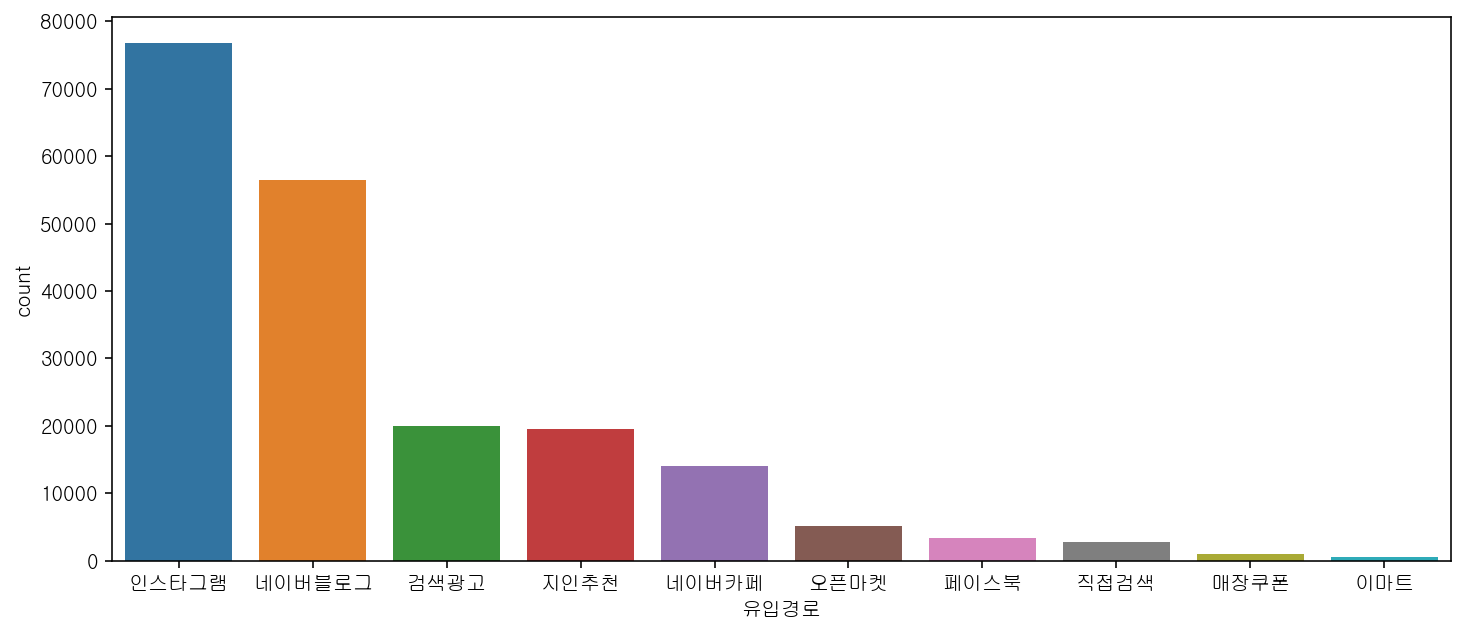

In [157]:
# 유입경로 순위

route = data.groupby('유입경로').agg(count = ('ID','count')).reset_index()
route = route.sort_values(by='count', ascending=False)
plt.figure(figsize=(12,5))
sns.barplot(data = route, x = '유입경로', y = 'count')

<AxesSubplot:xlabel='유입경로', ylabel='sum'>

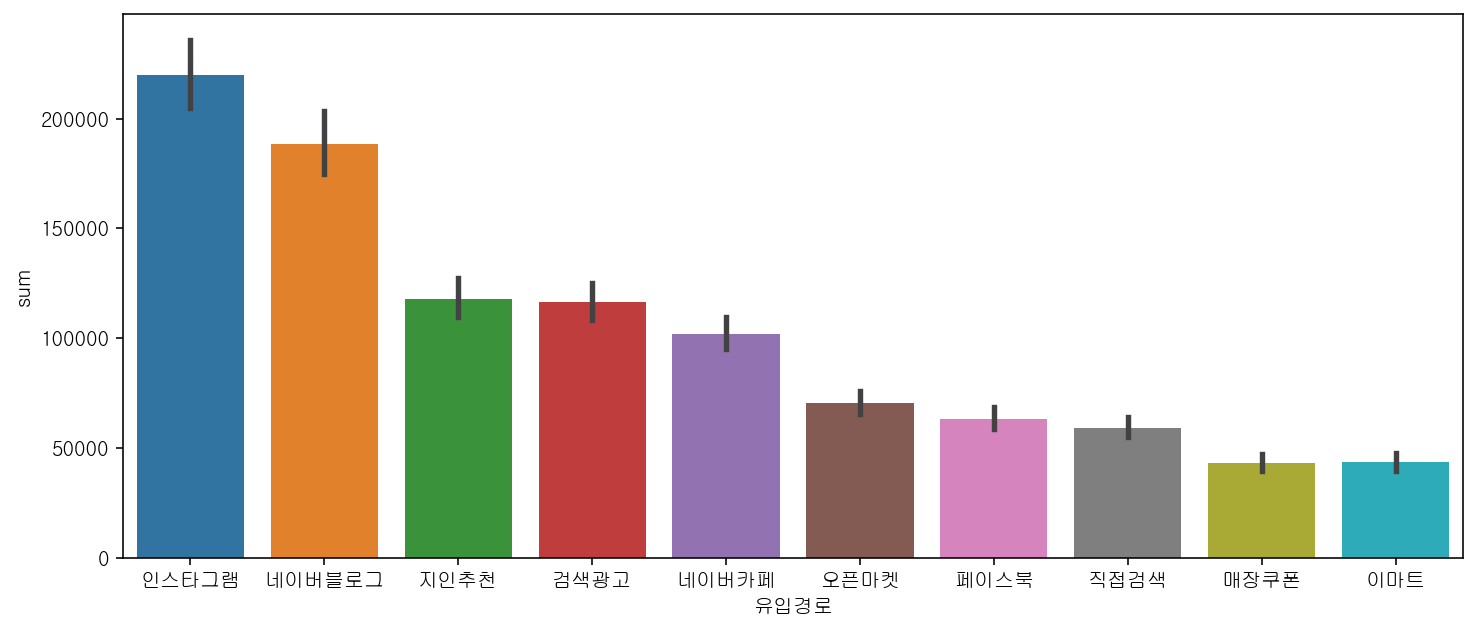

In [158]:
# 유입경로에 따른 고객별 구매금액

route_customer = data.groupby(['유입경로','구매금액','결제금액']).agg(sum = ('구매금액','sum')).reset_index()
route_customer = route_customer.sort_values(by='sum', ascending=False)
plt.figure(figsize=(12,5))
sns.barplot(data = route_customer, x = '유입경로', y = 'sum')

# 대체로 유입경로의 순위가 높은 순으로 판매금액도 높다는 것을 알 수 있음

<AxesSubplot:xlabel='상품명', ylabel='count'>

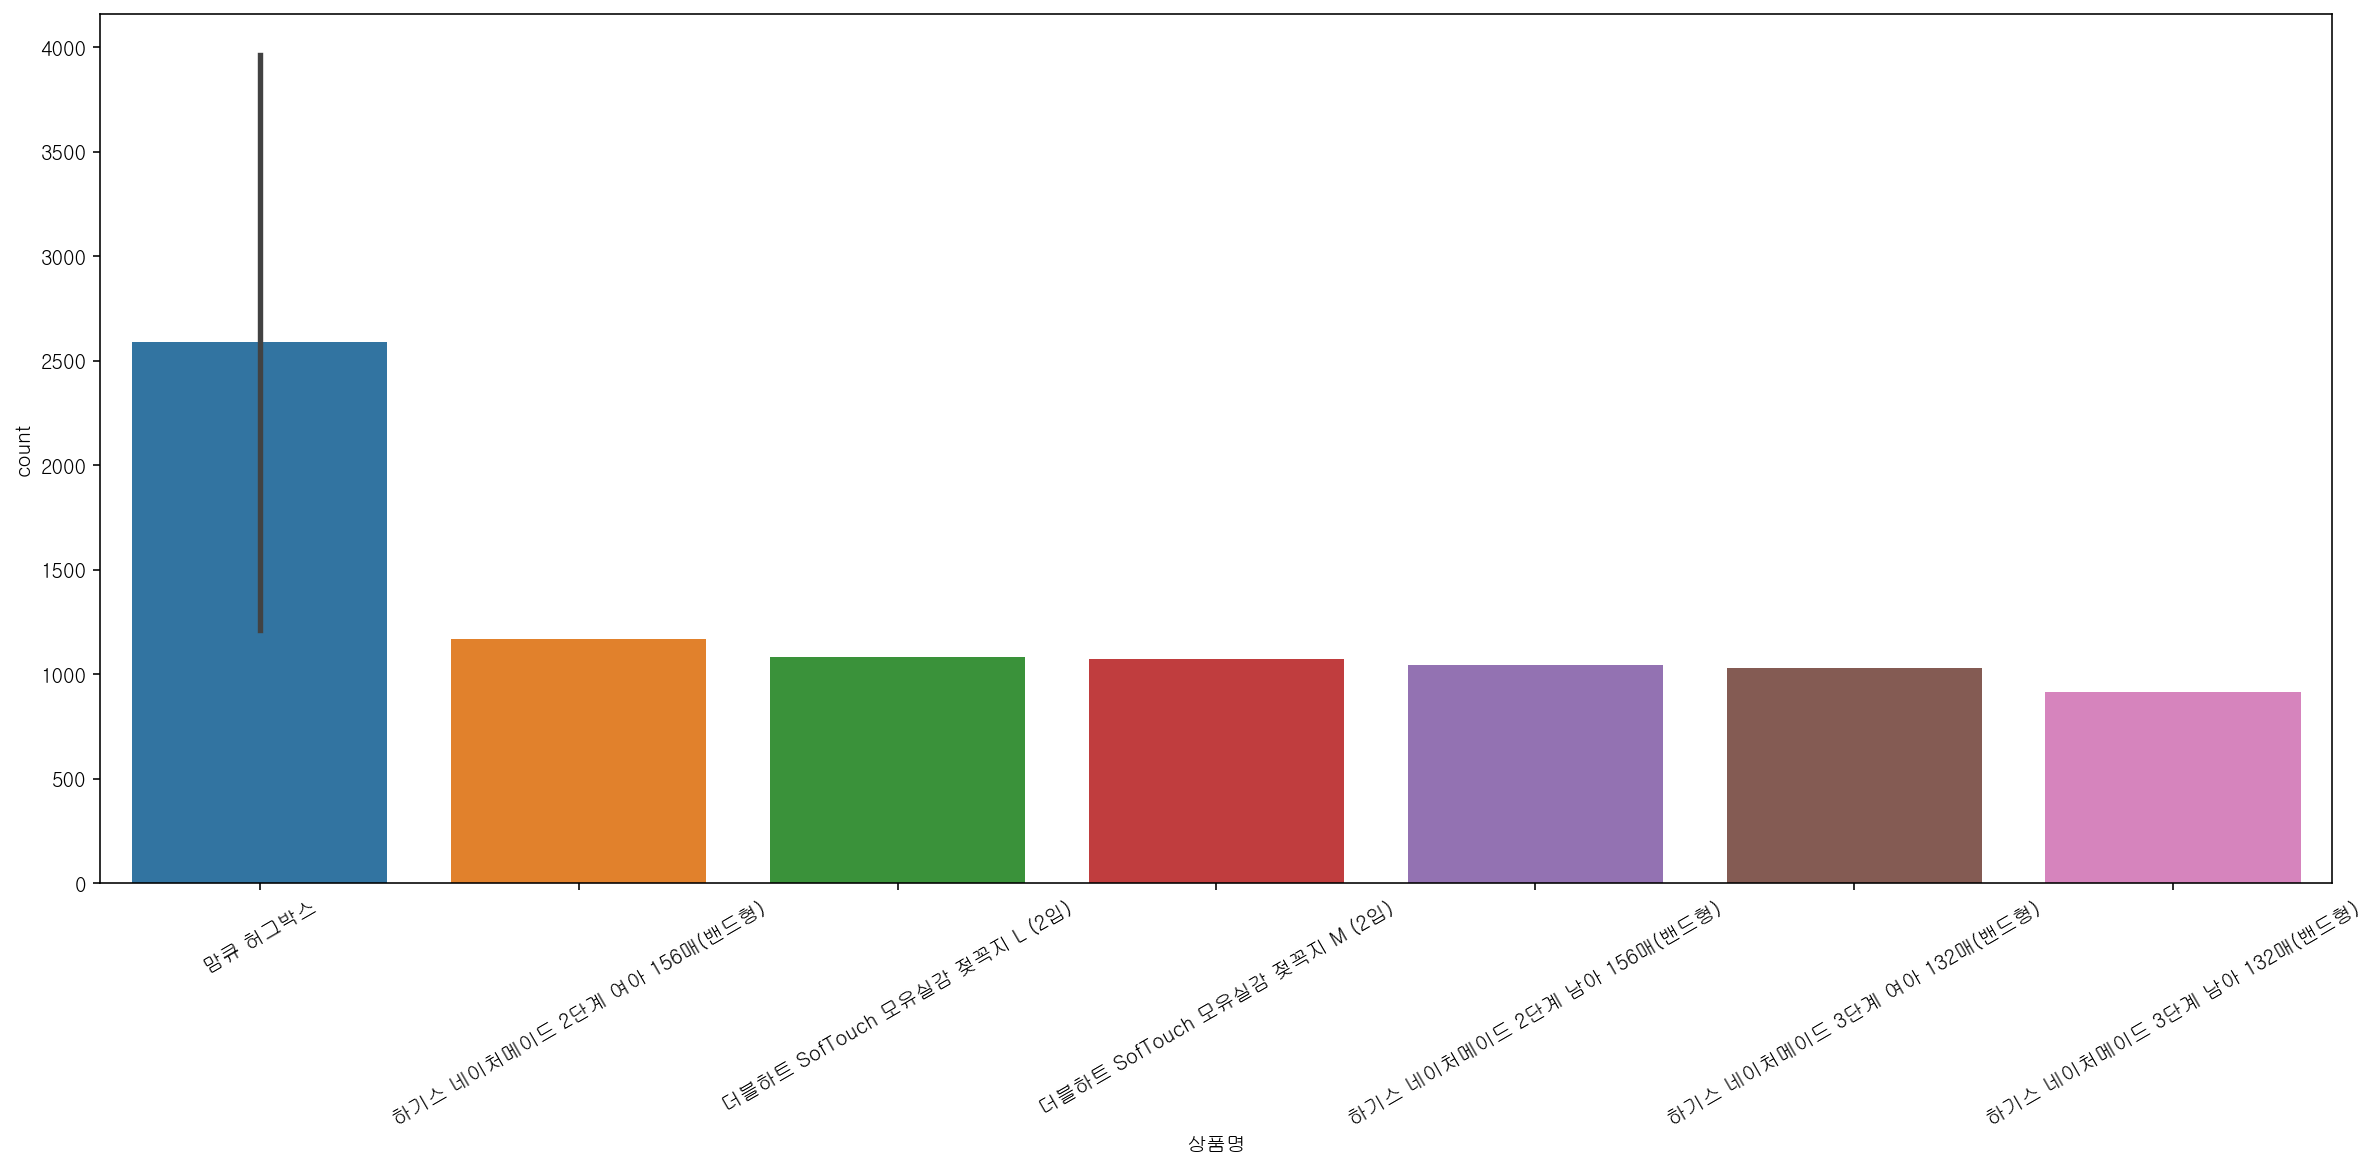

In [159]:
# 유입경로별 제품판매량 순위 top 10

route2 = data.groupby(['유입경로','상품명']).agg(count = ('상품명','count')).reset_index()
route2 = route2.sort_values(by='count', ascending=False)
sample = route2.head(10)
plt.figure(figsize=(20,8))
plt.xticks(rotation = 30)
sns.barplot(data = sample, x = '상품명', y = 'count')

<AxesSubplot:xlabel='결제등록카드', ylabel='count'>

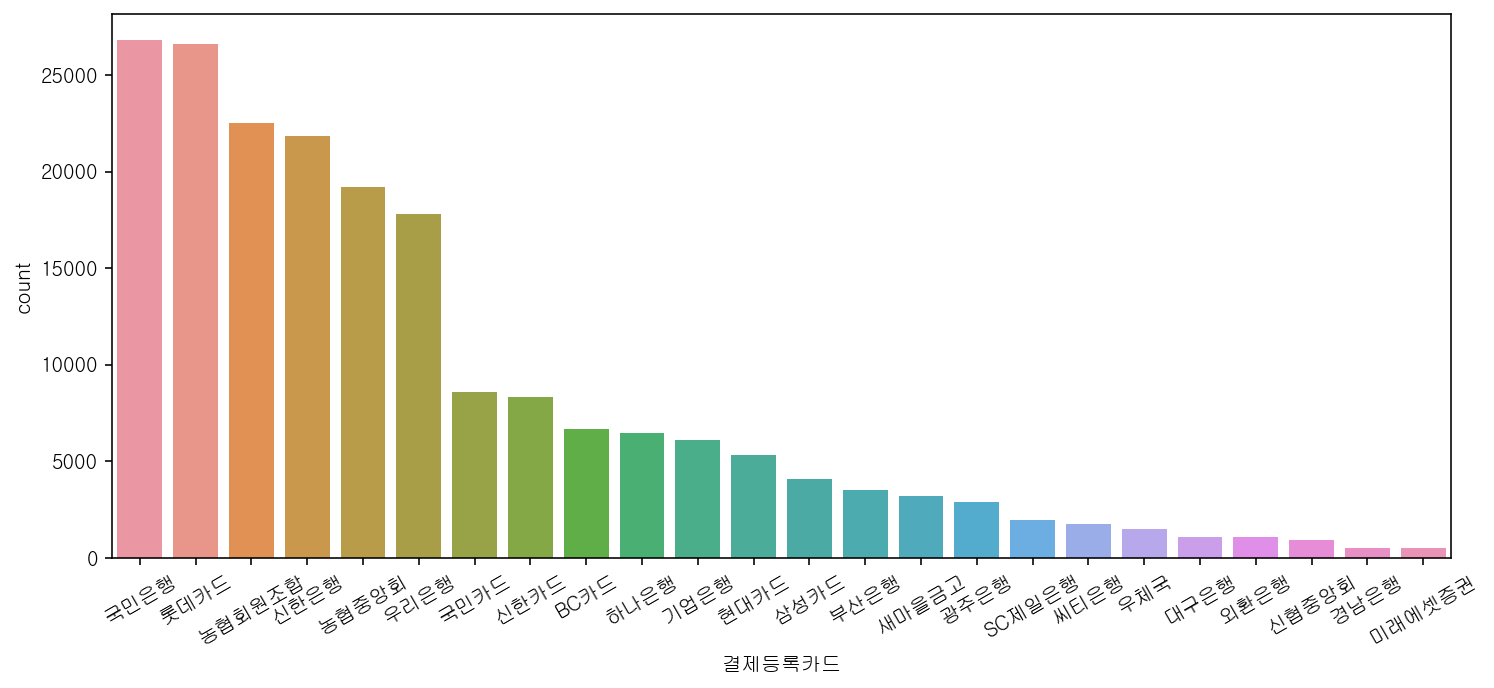

In [160]:
# 결제등록카드 높은순 정렬

card = data.groupby('결제등록카드').agg(count=('ID','count'))
card = card.sort_values(by='count', ascending=False)
plt.figure(figsize=(12,5))
plt.xticks(rotation = 30)
sns.barplot(data = card, x = card.index, y = 'count')

# 결제등록카드 별 제휴서비스.. 혜택주기 (고객이탈방지)